# Courtesy and Insights


https://blog.roboflow.com/keypoint-detection-on-roboflow/

James Gallagher. (Jan 5, 2024). Launch: Label, Train, Deploy Support for Keypoint Detection Models in Roboflow. Roboflow Blog: https://blog.roboflow.com/keypoint-detection-on-roboflow/

https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-keypoint.ipynb



# Step 1. Generate Person Standing and Fallen images using Dalle

Sample Prompts used :

create  image of a person fallen down and lying horizontally. The picture should be taken from the ground level  and side view, not from the top. Both head and toe should be visible.

create a realistic picture  of a person standing  it should cover from head to toe. The orientation should be vertical
And person should also be vertical. It should show the face with facial features as well and It should show the toe as well.





# Step 2. Convert downloaded images to jpeg

In [ ]:
import os
from PIL import Image

# Define the current directory and output directory
current_directory = os.getcwd()
output_directory = os.path.join(current_directory, 'jpg_images')

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Initialize a counter for the new filenames
file_counter = 1

# Loop through all files in the current directory
for filename in os.listdir(current_directory):
    if filename.endswith('.webp'):
        # Open the image file
        img_path = os.path.join(current_directory, filename)
        img = Image.open(img_path)

        # Convert the image to RGB (this is necessary for WEBP images)
        rgb_img = img.convert('RGB')

        # Define the new filename
        new_filename = f'f{file_counter}.jpg'
        new_path = os.path.join(output_directory, new_filename)

        # Save the image as JPG
        rgb_img.save(new_path, 'JPEG')

        print(f'Converted {filename} to {new_filename}')

        # Increment the file counter
        file_counter += 1

print('All images have been converted.')


# Step 3. Upload images to Roboflow.

Do manual annotation

Add Labels

Add Bounding boxes.

Add Keypoint Skeleton. Specify Head and Toe.

https://universe.roboflow.com/test-4h9f7/fall-detection-xjv3o

Split Images to train, test, valid datasets

# Step 4. Install packages

In [ ]:

import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196 -q

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.5/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

# Step 5. Download Dataset from roboflow

In [ ]:
import getpass
import os
YOUR_API_KEY = getpass.getpass()

··········


In [ ]:

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet



mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [ ]:
import requests

#YOUR_API_KEY = "YOUR_ACTUAL_API_KEY"  # Replace with your actual API key

url = "https://api.roboflow.com/"
headers = {"Authorization": f"Bearer {YOUR_API_KEY}"}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    workspaces = response.json()
    print(workspaces)
else:
    print(f"Error: {response.status_code}")
    print(response.text)

{'welcome': 'Welcome to the Roboflow API.', 'instructions': 'You are successfully authenticated.', 'docs': 'https://docs.roboflow.com', 'workspace': 'test-4h9f7'}


In [ ]:


from roboflow import Roboflow
rf = Roboflow(api_key=YOUR_API_KEY)
# project = rf.workspace("test-4h9f7").project("fall-detection-xjv3o")
# dataset = project.version(1).download("yolov5")


project = rf.workspace("test-4h9f7").project("fall-detection-xjv3o")
version = project.version(1)
dataset = version.download("yolov8")



# project = rf.workspace("test-4h9f7").project("fall-detection-xjv3o")
# version = project.version(1)
# dataset = version.download("yolov5")



loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls -ltr /content/datasets/

total 14184
drwxr-xr-x 5 root root    4096 Jul 22 19:43 fall-detection-1
-rw-r--r-- 1 root root 6828990 Jul 22 19:44 yolov8n-pose.pt
drwxr-xr-x 3 root root    4096 Jul 22 19:44 runs
-rw-r--r-- 1 root root 6534387 Jul 22 19:44 yolov8n.pt
-rw-r--r-- 1 root root 1146738 Jul 22 19:57 output_video.mp4


In [ ]:
#!rm -r -f /content/datasets/forest-fire-detection-1

#!rm -r -f /content/datasets/fall-detection-1

# Step 6. Train ultralytics YOLO POSE model

In [ ]:

from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')

results = model.train(data=f"{dataset.location}/data.yaml", epochs=40, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=pose, mode=train, model=yolov8n-pose.pt, data=/content/datasets/fall-detection-1/data.yaml, epochs=40, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fals

In [ ]:
!ls -ltr runs/pose/train/weights/

total 12536
-rw-r--r-- 1 root root 6415042 Jul 22 19:46 last.pt
-rw-r--r-- 1 root root 6415042 Jul 22 19:46 best.pt


# Step 7. Run Prediction on test images

In [ ]:
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))

results = model(os.path.join(f"{dataset.location}/test/images", random_file))

print(results[0].keypoints)


image 1/1 /content/datasets/fall-detection-1/test/images/f43_jpg.rf.f5fd6f11108bca238330b74c03f29f92.jpg: 640x640 2 persons, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.6523, 0.8726],
        [0.6463, 0.7836]], device='cuda:0')
data: tensor([[[ 81.4231, 389.1432,   0.6523],
         [529.4626, 308.6869,   0.8726]],

        [[ 33.8095, 380.9151,   0.6463],
         [498.3099, 306.5768,   0.7836]]], device='cuda:0')
has_visible: True
orig_shape: (640, 640)
shape: torch.Size([2, 2, 3])
xy: tensor([[[ 81.4231, 389.1432],
         [529.4626, 308.6869]],

        [[ 33.8095, 380.9151],
         [498.3099, 306.5768]]], device='cuda:0')
xyn: tensor([[[0.1272, 0.6080],
         [0.8273, 0.4823]],

        [[0.0528, 0.5952],
         [0.7786, 0.4790]]], device='cuda:0')


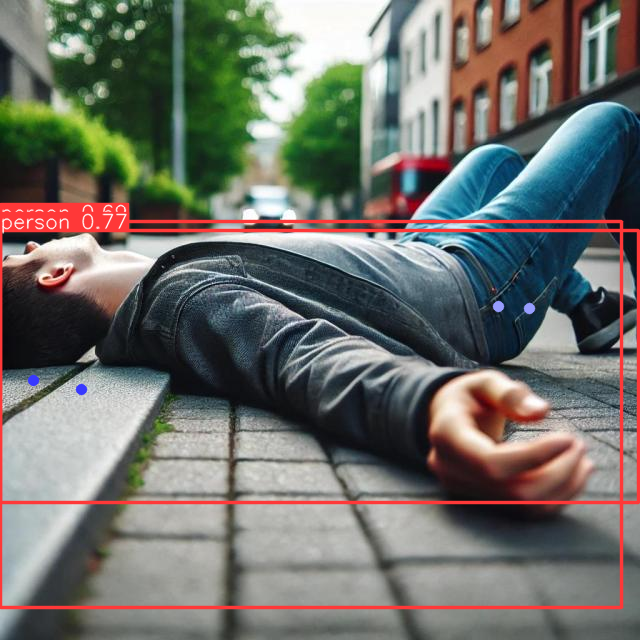

In [ ]:
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)

In [ ]:

import math

def check_angle_within_tolerance(xy, tolerance_degrees=30):
    p1, p2 = xy[0]

    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]

    angle_degrees = math.degrees(math.atan2(abs(dy), abs(dx))) if dx != 0 else 90
    print ('angle',abs(angle_degrees - 0))

    return abs(angle_degrees - 0) > tolerance_degrees

is_within_tolerance = check_angle_within_tolerance(results[0].keypoints.xy)
is_within_tolerance

angle 10.180339942766947


False


image 1/1 /content/datasets/fall-detection-1/test/images/f43_jpg.rf.f5fd6f11108bca238330b74c03f29f92.jpg: 640x640 2 persons, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.6523, 0.8726],
        [0.6463, 0.7836]], device='cuda:0')
data: tensor([[[ 81.4231, 389.1432,   0.6523],
         [529.4626, 308.6869,   0.8726]],

        [[ 33.8095, 380.9151,   0.6463],
         [498.3099, 306.5768,   0.7836]]], device='cuda:0')
has_visible: True
orig_shape: (640, 640)
shape: torch.Size([2, 2, 3])
xy: tensor([[[ 81.4231, 389.1432],
         [529.4626, 308.6869]],

        [[ 33.8095, 380.9151],
         [498.3099, 306.5768]]], device='cuda:0')
xyn: tensor([[[0.1272, 0.6080],
         [0.8273, 0.4823]],

        [[0.0528, 0.5952],
         [0.7786, 0.4790]]], device='cuda:0')


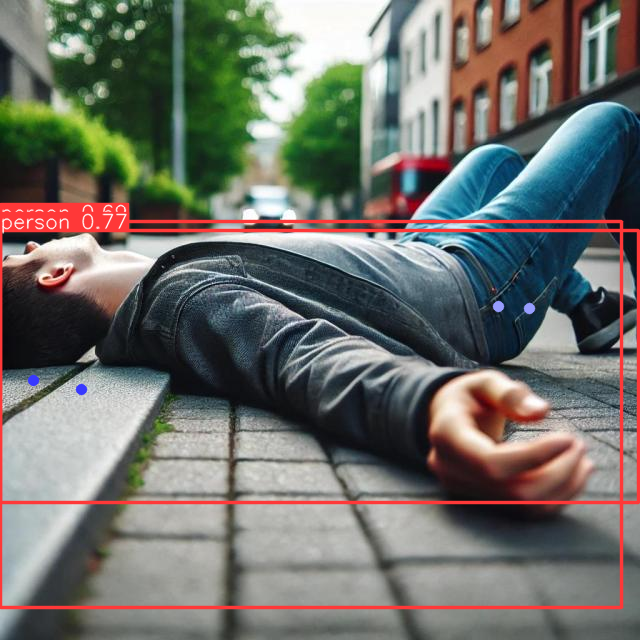

angle 10.180339942766947


False

In [ ]:
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))

results = model(os.path.join(f"{dataset.location}/test/images", random_file))

print(results[0].keypoints)
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)
import math

def check_angle_within_tolerance(xy, tolerance_degrees=30):
    p1, p2 = xy[0]

    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]

    angle_degrees = math.degrees(math.atan2(abs(dy), abs(dx))) if dx != 0 else 90
    print ('angle',abs(angle_degrees - 0))

    return abs(angle_degrees - 0) > tolerance_degrees

is_within_tolerance = check_angle_within_tolerance(results[0].keypoints.xy)
is_within_tolerance


image 1/1 /content/datasets/fall-detection-1/test/images/f3_jpg.rf.9b62008f85aee9f131e935544fab3a34.jpg: 640x640 2 persons, 9.5ms
Speed: 1.5ms preprocess, 9.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.8124, 0.9387],
        [0.7313, 0.8106]], device='cuda:0')
data: tensor([[[ 32.3568, 327.0573,   0.8124],
         [555.8057, 282.3390,   0.9387]],

        [[ 48.7113, 370.2398,   0.7313],
         [441.6175, 344.1662,   0.8106]]], device='cuda:0')
has_visible: True
orig_shape: (640, 640)
shape: torch.Size([2, 2, 3])
xy: tensor([[[ 32.3568, 327.0573],
         [555.8057, 282.3390]],

        [[ 48.7113, 370.2398],
         [441.6175, 344.1662]]], device='cuda:0')
xyn: tensor([[[0.0506, 0.5110],
         [0.8684, 0.4412]],

        [[0.0761, 0.5785],
         [0.6900, 0.5378]]], device='cuda:0')


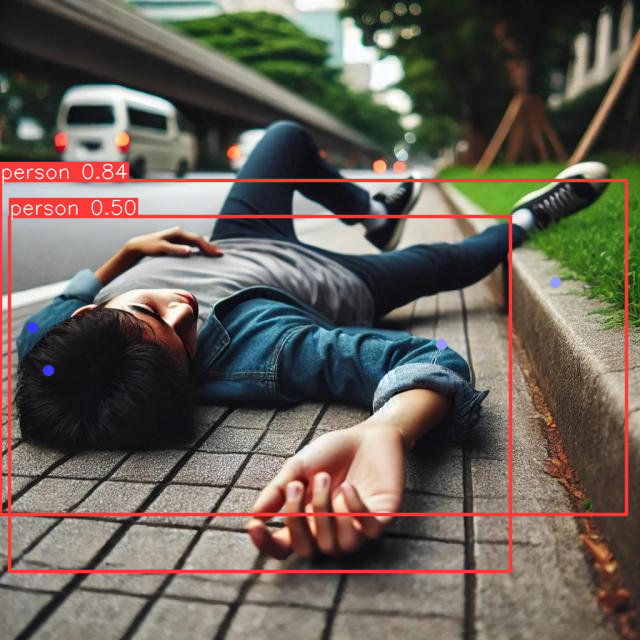

angle 4.882935288996415


False

In [ ]:
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))

results = model(os.path.join(f"{dataset.location}/test/images", random_file))

print(results[0].keypoints)
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)
import math

def check_angle_within_tolerance(xy, tolerance_degrees=30):
    p1, p2 = xy[0]

    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]

    angle_degrees = math.degrees(math.atan2(abs(dy), abs(dx))) if dx != 0 else 90
    print ('angle',abs(angle_degrees - 0))

    return abs(angle_degrees - 0) > tolerance_degrees

is_within_tolerance = check_angle_within_tolerance(results[0].keypoints.xy)
is_within_tolerance


image 1/1 /content/datasets/fall-detection-1/test/images/f36_jpg.rf.150f27b65e40a9956a3ca1402ff0e9a3.jpg: 640x640 2 persons, 8.0ms
Speed: 1.5ms preprocess, 8.0ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.6176, 0.9308],
        [0.6569, 0.8877]], device='cuda:0')
data: tensor([[[ 78.0193, 409.2501,   0.6176],
         [555.9677, 354.2292,   0.9308]],

        [[ 55.8646, 164.4431,   0.6569],
         [389.6362, 181.5658,   0.8877]]], device='cuda:0')
has_visible: True
orig_shape: (640, 640)
shape: torch.Size([2, 2, 3])
xy: tensor([[[ 78.0193, 409.2501],
         [555.9677, 354.2292]],

        [[ 55.8646, 164.4431],
         [389.6362, 181.5658]]], device='cuda:0')
xyn: tensor([[[0.1219, 0.6395],
         [0.8687, 0.5535]],

        [[0.0873, 0.2569],
         [0.6088, 0.2837]]], device='cuda:0')


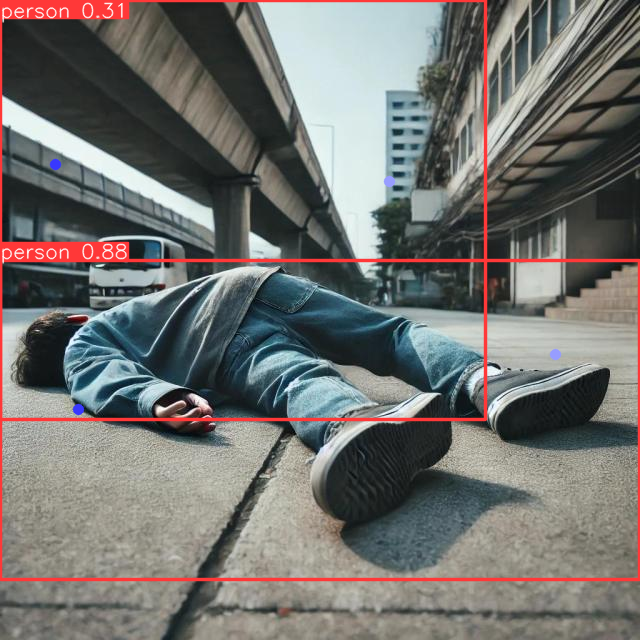

angle 6.566913532909143


False

In [ ]:
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))

results = model(os.path.join(f"{dataset.location}/test/images", random_file))

print(results[0].keypoints)
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)
import math

def check_angle_within_tolerance(xy, tolerance_degrees=30):
    p1, p2 = xy[0]

    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]

    angle_degrees = math.degrees(math.atan2(abs(dy), abs(dx))) if dx != 0 else 90
    print ('angle',abs(angle_degrees - 0))

    return abs(angle_degrees - 0) > tolerance_degrees

is_within_tolerance = check_angle_within_tolerance(results[0].keypoints.xy)
is_within_tolerance


image 1/1 /content/datasets/fall-detection-1/test/images/f84_jpg.rf.51bd9f73b5f93234d3eff92679920a45.jpg: 640x640 1 person, 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.5640, 0.5672]], device='cuda:0')
data: tensor([[[300.1645, 127.8480,   0.5640],
         [362.8337, 409.2454,   0.5672]]], device='cuda:0')
has_visible: True
orig_shape: (640, 640)
shape: torch.Size([1, 2, 3])
xy: tensor([[[300.1645, 127.8480],
         [362.8337, 409.2454]]], device='cuda:0')
xyn: tensor([[[0.4690, 0.1998],
         [0.5669, 0.6394]]], device='cuda:0')


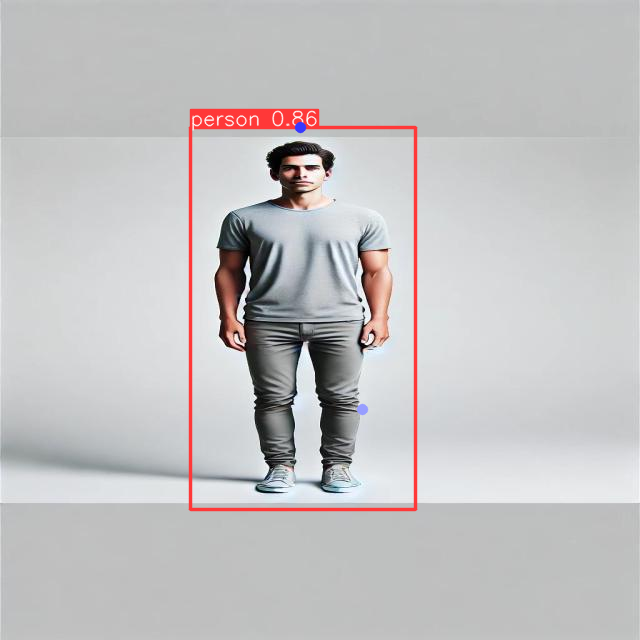

angle 77.4447109113992


True

In [ ]:
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))

results = model(os.path.join(f"{dataset.location}/test/images", random_file))

print(results[0].keypoints)
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)
import math

def check_angle_within_tolerance(xy, tolerance_degrees=30):
    p1, p2 = xy[0]

    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]

    angle_degrees = math.degrees(math.atan2(abs(dy), abs(dx))) if dx != 0 else 90
    print ('angle',abs(angle_degrees - 0))

    return abs(angle_degrees - 0) > tolerance_degrees

is_within_tolerance = check_angle_within_tolerance(results[0].keypoints.xy)
is_within_tolerance


image 1/1 /content/datasets/fall-detection-1/test/images/f35_jpg.rf.3a456611bb386736b19947617073332e.jpg: 640x640 1 person, 9.9ms
Speed: 1.5ms preprocess, 9.9ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.8628, 0.9064]], device='cuda:0')
data: tensor([[[118.3300, 457.5303,   0.8628],
         [533.9440, 393.5272,   0.9064]]], device='cuda:0')
has_visible: True
orig_shape: (640, 640)
shape: torch.Size([1, 2, 3])
xy: tensor([[[118.3300, 457.5303],
         [533.9440, 393.5272]]], device='cuda:0')
xyn: tensor([[[0.1849, 0.7149],
         [0.8343, 0.6149]]], device='cuda:0')


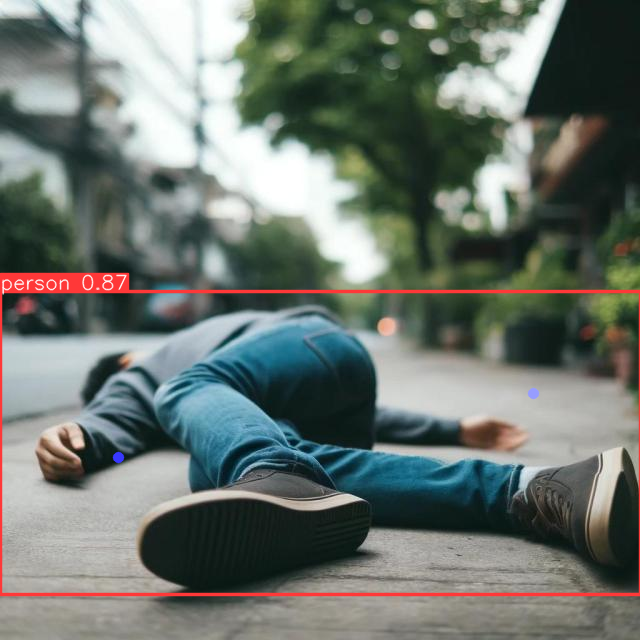

angle 8.754576146457714


False

In [ ]:
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))

results = model(os.path.join(f"{dataset.location}/test/images", random_file))

print(results[0].keypoints)
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)
import math

def check_angle_within_tolerance(xy, tolerance_degrees=30):
    p1, p2 = xy[0]

    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]

    angle_degrees = math.degrees(math.atan2(abs(dy), abs(dx))) if dx != 0 else 90
    print ('angle',abs(angle_degrees - 0))

    return abs(angle_degrees - 0) > tolerance_degrees

is_within_tolerance = check_angle_within_tolerance(results[0].keypoints.xy)
is_within_tolerance


image 1/1 /content/datasets/fall-detection-1/test/images/f84_jpg.rf.51bd9f73b5f93234d3eff92679920a45.jpg: 640x640 1 person, 17.0ms
Speed: 1.7ms preprocess, 17.0ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.5640, 0.5672]], device='cuda:0')
data: tensor([[[300.1645, 127.8480,   0.5640],
         [362.8337, 409.2454,   0.5672]]], device='cuda:0')
has_visible: True
orig_shape: (640, 640)
shape: torch.Size([1, 2, 3])
xy: tensor([[[300.1645, 127.8480],
         [362.8337, 409.2454]]], device='cuda:0')
xyn: tensor([[[0.4690, 0.1998],
         [0.5669, 0.6394]]], device='cuda:0')


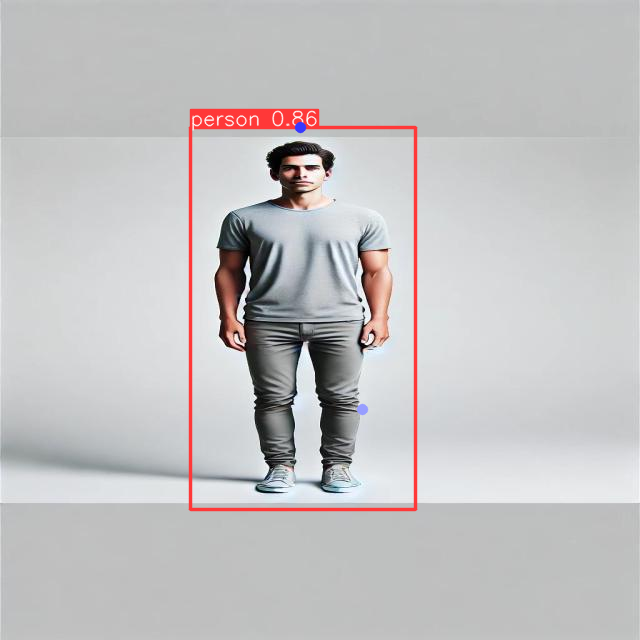

angle 77.4447109113992


True

In [ ]:
model = YOLO('runs/pose/train/weights/best.pt')

import os
import random

random_file = random.choice(os.listdir(f"{dataset.location}/test/images"))

results = model(os.path.join(f"{dataset.location}/test/images", random_file))

print(results[0].keypoints)
from PIL import Image

r = results[0]
im_array = r.plot()  # plot a BGR numpy array of predictions
im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
display(im)
import math

def check_angle_within_tolerance(xy, tolerance_degrees=30):
    p1, p2 = xy[0]

    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]

    angle_degrees = math.degrees(math.atan2(abs(dy), abs(dx))) if dx != 0 else 90
    print ('angle',abs(angle_degrees - 0))

    return abs(angle_degrees - 0) > tolerance_degrees

is_within_tolerance = check_angle_within_tolerance(results[0].keypoints.xy)
is_within_tolerance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 8. Run Prediction on video

In [ ]:
import os
import random
import cv2
import math
from PIL import Image
from ultralytics import YOLO  # Assuming you are using ultralytics YOLO
from IPython.display import HTML
from base64 import b64encode

# Load the YOLO model
model = YOLO('runs/pose/train/weights/best.pt')

# Function to calculate the angle and determine if the person is fallen
def check_angle_within_tolerance(xy, tolerance_degrees=30):
    p1, p2 = xy[0]

    dx = p2[0] - p1[0]
    dy = p2[1] - p1[1]

    angle_degrees = math.degrees(math.atan2(abs(dy), abs(dx))) if dx != 0 else 90
    print('Angle:', abs(angle_degrees - 0))

    return abs(angle_degrees - 0) > tolerance_degrees

# Read video file
video_path = "/content/drive/My Drive/Colab Notebooks/stand_fall.mp4"
output_path = "output_video.mp4"
cap = cv2.VideoCapture(video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use 'mp4v' codec for compatibility
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Calculate the number of frames to process for 5 seconds
frames_to_process = 20 * fps
frame_count = 0

while cap.isOpened() and frame_count < frames_to_process:
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLO model on the frame
    results = model(frame)

    if results:
        keypoints = results[0].keypoints
        if keypoints:
            is_standing = check_angle_within_tolerance(keypoints.xy)
            status_text = "Person is standing" if is_standing else "Person has fallen down"
            print(status_text)

            # Add the status text to the frame
            cv2.putText(frame, status_text, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Display the frame with keypoints and status text
    im_array = results[0].plot()
    out.write(im_array)

    frame_count += 1

cap.release()
out.release()
cv2.destroyAllWindows()





0: 384x640 1 person, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.5ms
Speed: 1.9ms preprocess, 13.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 2.5ms preprocess, 8.0ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.8ms
Speed: 3.0ms preprocess, 7.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.56714620530786
Person is standing
Angle: 84.82699970112203
Person is standing
Angle: 84.78157824774736
Person is standing
Angle: 84.80420367192424
Person is standing
Angle: 84.6075865209356
Person is standing
Angle: 84.56009095096339
Person is standing
Angle: 84.42636829398023
Person is standing



0: 384x640 1 person, 8.0ms
Speed: 2.4ms preprocess, 8.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.6ms
Speed: 2.9ms preprocess, 19.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.4ms
Speed: 2.7ms preprocess, 8.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.0ms
Speed: 4.2ms preprocess, 9.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.35391261326055
Person is standing
Angle: 84.31042023585834
Person is standing
Angle: 84.31713685356586
Person is standing
Angle: 84.29101415630655
Person is standing
Angle: 84.28633950152242
Person is standing
Angle: 84.28921793081875
Person is standing
Angle: 84.28504625761568
Person is standing


0: 384x640 1 person, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.2ms
Speed: 2.1ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.9ms
Speed: 2.8ms preprocess, 7.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.8ms
Speed: 3.3ms preprocess, 7.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 2.6ms preprocess, 8.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 2.4ms preprocess, 11.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.28911843575246
Person is standing
Angle: 84.28504625761568
Person is standing
Angle: 84.28911843575246
Person is standing
Angle: 84.28504625761568
Person is standing
Angle: 84.28911843575246
Person is standing
Angle: 84.28504625761568
Person is standing
Angle: 84.28000075272284
Person is standing



0: 384x640 1 person, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 2.2ms preprocess, 12.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 3.4ms preprocess, 11.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.6ms
Speed: 2.5ms preprocess, 15.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.27620165178475
Person is standing
Angle: 84.28000075272284
Person is standing
Angle: 84.27620165178475
Person is standing
Angle: 84.28000075272284
Person is standing
Angle: 84.27620165178475
Person is standing
Angle: 84.28000075272284
Person is standing


0: 384x640 1 person, 13.6ms
Speed: 2.6ms preprocess, 13.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.7ms
Speed: 2.1ms preprocess, 10.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.27620165178475
Person is standing
Angle: 84.28000075272284
Person is standing
Angle: 84.27620165178475
Person is standing
Angle: 84.18090822973375
Person is standing
Angle: 84.19262123531469
Person is standing
Angle: 84.18059562868672
Person is standing


0: 384x640 1 person, 11.4ms
Speed: 2.5ms preprocess, 11.4ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 2.9ms preprocess, 11.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.18559845542683
Person is standing
Angle: 84.17561566007602
Person is standing
Angle: 84.18555945812307
Person is standing
Angle: 84.17561566007602
Person is standing
Angle: 84.18555945812307
Person is standing
Angle: 84.17561566007602
Person is standing
Angle: 84.18555945812307
Person is standing



0: 384x640 1 person, 10.7ms
Speed: 2.4ms preprocess, 10.7ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.9ms
Speed: 2.6ms preprocess, 13.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 2.4ms preprocess, 8.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 2.5ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.17561566007602
Person is standing
Angle: 84.18555945812307
Person is standing
Angle: 84.17561566007602
Person is standing
Angle: 84.18555945812307
Person is standing
Angle: 84.17561566007602
Person is standing
Angle: 84.18555945812307
Person is standing


0: 384x640 1 person, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.4ms
Speed: 2.7ms preprocess, 8.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 2.6ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.8ms
Speed: 3.2ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 2.1ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 2.4ms preprocess, 11.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.0ms
Speed: 3.0ms preprocess, 13.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.17561566007602
Person is standing
Angle: 84.18555945812307
Person is standing
Angle: 84.17561566007602
Person is standing
Angle: 84.18555945812307
Person is standing
Angle: 84.17561566007602
Person is standing
Angle: 84.18555945812307
Person is standing
Angle: 84.17561566007602
Person is standing


0: 384x640 1 person, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 3.1ms preprocess, 10.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.1ms
Speed: 2.6ms preprocess, 17.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 3.4ms preprocess, 11.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.18555945812307
Person is standing
Angle: 84.17561566007602
Person is standing
Angle: 84.18555945812307
Person is standing
Angle: 84.17561566007602
Person is standing
Angle: 84.18457058492599
Person is standing
Angle: 84.13486093004049
Person is standing


0: 384x640 1 person, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.9ms
Speed: 2.7ms preprocess, 7.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 2.7ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 2.7ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.8ms
Speed: 2.7ms preprocess, 7.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.9ms
Speed: 2.5ms preprocess, 7.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.8ms
Speed: 4.7ms preprocess, 8.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.11481343166547
Person is standing
Angle: 84.34758300942785
Person is standing
Angle: 84.37043161597624
Person is standing
Angle: 84.38219253488965
Person is standing
Angle: 84.38111219992395
Person is standing
Angle: 84.37870663849411
Person is standing
Angle: 84.37858830213726
Person is standing
Angle: 84.36742301664277
Person is standing



0: 384x640 1 person, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 2.7ms preprocess, 8.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.8ms
Speed: 2.7ms preprocess, 7.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.2ms
Speed: 2.7ms preprocess, 8.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.9ms
Speed: 2.5ms preprocess, 7.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 2.9ms preprocess, 11.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.36851704434648
Person is standing
Angle: 84.36782047565967
Person is standing
Angle: 84.35984646660815
Person is standing
Angle: 84.42165947397942
Person is standing
Angle: 84.4210613033301
Person is standing
Angle: 84.41936805189201
Person is standing
Angle: 84.45561974010707
Person is standing


0: 384x640 1 person, 11.8ms
Speed: 2.8ms preprocess, 11.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.42454005902559
Person is standing
Angle: 84.45347225842751
Person is standing
Angle: 84.42518072757203
Person is standing
Angle: 84.4557057322048
Person is standing
Angle: 84.42645366398563
Person is standing
Angle: 84.45461636484569
Person is standing
Angle: 84.42638714982796
Person is standing
Angle: 84.45563829635053
Person is standing



0: 384x640 1 person, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.2ms
Speed: 2.6ms preprocess, 8.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 2.3ms preprocess, 12.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 2.4ms preprocess, 12.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.42662856248789
Person is standing
Angle: 84.4547924959384
Person is standing
Angle: 84.42662856248789
Person is standing
Angle: 84.45583666868329
Person is standing
Angle: 84.42662856248789
Person is standing
Angle: 84.4547924959384
Person is standing


0: 384x640 1 person, 13.2ms
Speed: 2.0ms preprocess, 13.2ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 2.3ms preprocess, 12.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 2.3ms preprocess, 11.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.42670429529917
Person is standing
Angle: 84.4559496359542
Person is standing
Angle: 84.17879872813381
Person is standing
Angle: 84.20735981190492
Person is standing
Angle: 84.20319365961784
Person is standing
Angle: 84.20078602177654
Person is standing


0: 384x640 1 person, 14.8ms
Speed: 3.4ms preprocess, 14.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.9ms
Speed: 2.1ms preprocess, 13.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.19736400554707
Person is standing
Angle: 84.20131953518614
Person is standing
Angle: 84.19752322627676
Person is standing
Angle: 84.20209900843543
Person is standing
Angle: 84.19909839248449
Person is standing


0: 384x640 1 person, 17.4ms
Speed: 2.0ms preprocess, 17.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 2.3ms preprocess, 13.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.20205559742911
Person is standing
Angle: 84.19938342186234
Person is standing
Angle: 84.20287554554321
Person is standing
Angle: 84.19989653438697
Person is standing
Angle: 84.20302203750299
Person is standing


0: 384x640 1 person, 13.9ms
Speed: 3.1ms preprocess, 13.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.2ms
Speed: 2.3ms preprocess, 10.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 2.1ms preprocess, 10.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.19966921623755
Person is standing
Angle: 84.20234790789783
Person is standing
Angle: 84.19938342186234
Person is standing
Angle: 84.2025176271319
Person is standing
Angle: 84.19938342186234
Person is standing
Angle: 84.20287554554321
Person is standing


0: 384x640 1 person, 15.6ms
Speed: 3.0ms preprocess, 15.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 2.3ms preprocess, 14.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 2.3ms preprocess, 12.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 2.6ms preprocess, 12.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms


Angle: 84.19989653438697
Person is standing
Angle: 84.20302203750299
Person is standing
Angle: 84.19966921623755
Person is standing
Angle: 84.20234790789783
Person is standing
Angle: 84.19938342186234
Person is standing


Speed: 1.8ms preprocess, 14.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.2ms
Speed: 2.3ms preprocess, 10.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 5.2ms preprocess, 11.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 2.2ms preprocess, 12.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.2025176271319
Person is standing
Angle: 84.19806435923269
Person is standing
Angle: 84.19552583530641
Person is standing
Angle: 84.17426043730434
Person is standing
Angle: 84.18059493104867
Person is standing
Angle: 84.134885777302
Person is standing



0: 384x640 1 person, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.7ms
Speed: 3.0ms preprocess, 9.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 1.7ms preprocess, 13.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.8ms
Speed: 1.8ms preprocess, 19.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.10183404719761
Person is standing
Angle: 84.10539273179315
Person is standing
Angle: 84.11455260609144
Person is standing
Angle: 84.10925386913372
Person is standing
Angle: 84.11403014794112
Person is standing
Angle: 84.11033329161478
Person is standing



0: 384x640 1 person, 11.8ms
Speed: 2.5ms preprocess, 11.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.7ms
Speed: 2.0ms preprocess, 18.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.11428046883555
Person is standing
Angle: 84.11067255813569
Person is standing
Angle: 84.11442707672964
Person is standing
Angle: 84.1099610479739
Person is standing
Angle: 84.11441005880607
Person is standing


0: 384x640 1 person, 15.1ms
Speed: 2.0ms preprocess, 15.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.9ms
Speed: 4.0ms preprocess, 15.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.3ms
Speed: 1.9ms preprocess, 19.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.2ms
Speed: 1.9ms preprocess, 15.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.10996896582814
Person is standing
Angle: 84.11387291692732
Person is standing
Angle: 84.10996896582814
Person is standing
Angle: 84.11387291692732
Person is standing
Angle: 84.10996896582814
Person is standing


0: 384x640 1 person, 15.4ms
Speed: 2.2ms preprocess, 15.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.5ms
Speed: 5.4ms preprocess, 13.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.5ms
Speed: 3.0ms preprocess, 14.5ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.7ms
Speed: 2.2ms preprocess, 13.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.7ms
Speed: 3.2ms preprocess, 14.7ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.11441005880607
Person is standing
Angle: 84.10996896582814
Person is standing
Angle: 84.11471601121141
Person is standing
Angle: 84.10505411913525
Person is standing
Angle: 84.10872654025543
Person is standing



0: 384x640 1 person, 14.8ms
Speed: 2.6ms preprocess, 14.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 3.6ms preprocess, 12.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 3.6ms preprocess, 12.9ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.0ms
Speed: 3.6ms preprocess, 13.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.11046968829932
Person is standing
Angle: 84.1060069483954
Person is standing
Angle: 84.1278108228533
Person is standing
Angle: 84.12493055064616
Person is standing
Angle: 84.1095477340341
Person is standing


0: 384x640 1 person, 12.6ms
Speed: 1.7ms preprocess, 12.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 3.1ms preprocess, 10.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms
Speed: 2.9ms preprocess, 14.2ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.0ms
Speed: 1.7ms preprocess, 17.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.11558524013968
Person is standing
Angle: 84.11030293883734
Person is standing
Angle: 84.11502547831785
Person is standing
Angle: 84.20668567591287
Person is standing
Angle: 84.19436339080936
Person is standing
Angle: 84.19673963978808
Person is standing



0: 384x640 1 person, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.6ms
Speed: 2.2ms preprocess, 15.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.0ms
Speed: 1.8ms preprocess, 18.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.20469366319425
Person is standing
Angle: 84.20180088753914
Person is standing
Angle: 84.19986588393397
Person is standing
Angle: 84.19941542367336
Person is standing
Angle: 84.19956629856294
Person is standing
Angle: 84.19941542367336
Person is standing



0: 384x640 1 person, 12.8ms
Speed: 2.5ms preprocess, 12.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.7ms
Speed: 3.5ms preprocess, 11.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.5ms
Speed: 2.1ms preprocess, 13.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 2.2ms preprocess, 12.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 2.4ms preprocess, 11.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.5ms
Speed: 2.1ms preprocess, 13.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.19941542367336
Person is standing
Angle: 84.19941542367336
Person is standing
Angle: 84.19941542367336
Person is standing
Angle: 84.19941542367336
Person is standing
Angle: 84.19956629856294
Person is standing



0: 384x640 1 person, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.2ms


Angle: 84.19941542367336
Person is standing
Angle: 84.19941542367336
Person is standing
Angle: 84.19941542367336
Person is standing
Angle: 84.19941542367336
Person is standing
Angle: 84.19941542367336
Person is standing


Speed: 3.2ms preprocess, 15.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.7ms
Speed: 2.2ms preprocess, 13.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.19956629856294
Person is standing
Angle: 84.19941542367336
Person is standing
Angle: 84.19941542367336
Person is standing
Angle: 84.19941542367336
Person is standing
Angle: 84.19941542367336
Person is standing


0: 384x640 1 person, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 23.6ms
Speed: 5.0ms preprocess, 23.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.19931392219635
Person is standing
Angle: 84.19946661860668
Person is standing
Angle: 84.19931392219635
Person is standing
Angle: 84.16288197661187
Person is standing
Angle: 84.17110242956076
Person is standing


0: 384x640 1 person, 13.1ms
Speed: 2.0ms preprocess, 13.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.4ms
Speed: 4.0ms preprocess, 19.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.6ms
Speed: 1.8ms preprocess, 17.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.3ms
Speed: 2.0ms preprocess, 15.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.16489757525842
Person is standing
Angle: 84.28794064405191
Person is standing
Angle: 84.27312551956018
Person is standing
Angle: 84.27113830942717
Person is standing
Angle: 84.27811818627794
Person is standing


0: 384x640 1 person, 22.5ms
Speed: 2.6ms preprocess, 22.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 4.1ms preprocess, 14.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.4ms
Speed: 1.7ms preprocess, 14.4ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.1ms
Speed: 1.8ms preprocess, 18.1ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.27123915893524
Person is standing
Angle: 84.28224495061669
Person is standing
Angle: 84.27541342733504
Person is standing
Angle: 84.28155126103351
Person is standing
Angle: 84.27473736809334
Person is standing



0: 384x640 1 person, 20.0ms
Speed: 1.9ms preprocess, 20.0ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 24.9ms
Speed: 1.9ms preprocess, 24.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.28155126103351
Person is standing
Angle: 84.27473736809334
Person is standing
Angle: 84.28155126103351
Person is standing
Angle: 84.27473736809334
Person is standing
Angle: 84.28155126103351
Person is standing



0: 384x640 1 person, 13.2ms
Speed: 1.7ms preprocess, 13.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.9ms
Speed: 1.7ms preprocess, 18.9ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.3ms
Speed: 1.7ms preprocess, 17.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.27473736809334
Person is standing
Angle: 84.28155126103351
Person is standing
Angle: 84.27473736809334
Person is standing
Angle: 84.28155126103351
Person is standing
Angle: 84.27473736809334
Person is standing


0: 384x640 1 person, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 3.3ms preprocess, 12.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.0ms
Speed: 1.7ms preprocess, 13.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 21.7ms


Angle: 84.28155126103351
Person is standing
Angle: 84.27473736809334
Person is standing
Angle: 84.28155126103351
Person is standing
Angle: 84.27473736809334
Person is standing
Angle: 84.28155126103351
Person is standing


Speed: 3.8ms preprocess, 21.7ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.0ms
Speed: 2.2ms preprocess, 16.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.1ms
Speed: 2.1ms preprocess, 15.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.5ms
Speed: 3.2ms preprocess, 16.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.27473736809334
Person is standing
Angle: 84.28155126103351
Person is standing
Angle: 84.27473736809334
Person is standing
Angle: 84.28155126103351
Person is standing
Angle: 84.27473736809334
Person is standing



0: 384x640 1 person, 22.0ms
Speed: 4.7ms preprocess, 22.0ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.28155126103351
Person is standing
Angle: 84.25908725841389
Person is standing
Angle: 84.22261220756732
Person is standing
Angle: 84.22553098790813
Person is standing
Angle: 84.22657442861698
Person is standing


0: 384x640 1 person, 8.5ms
Speed: 2.1ms preprocess, 8.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.9ms
Speed: 3.1ms preprocess, 7.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 2.5ms preprocess, 8.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.8ms
Speed: 2.4ms preprocess, 8.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.8ms
Speed: 3.2ms preprocess, 7.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms


Angle: 84.22456188118196
Person is standing
Angle: 84.22655469359829
Person is standing
Angle: 84.22446919677556
Person is standing
Angle: 84.22643840899266
Person is standing
Angle: 84.22446919677556
Person is standing
Angle: 84.22643840899266
Person is standing
Angle: 84.22446919677556
Person is standing


Speed: 2.1ms preprocess, 8.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 2.6ms preprocess, 9.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 2.2ms preprocess, 8.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 2.7ms preprocess, 8.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms


Angle: 84.22643840899266
Person is standing
Angle: 84.22446919677556
Person is standing
Angle: 84.22643840899266
Person is standing
Angle: 84.22307219091935
Person is standing
Angle: 84.22496900587576
Person is standing
Angle: 84.2145766408393
Person is standing
Angle: 84.22591928272342
Person is standing


Speed: 2.2ms preprocess, 11.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 3.2ms preprocess, 8.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 3.3ms preprocess, 11.9ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.1ms
Speed: 2.4ms preprocess, 13.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 3.0ms preprocess, 12.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.4ms
Speed: 6.3ms preprocess, 16.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.22053608094247
Person is standing
Angle: 84.22448348796783
Person is standing
Angle: 84.22450377968501
Person is standing
Angle: 84.21914312663239
Person is standing
Angle: 84.22260538555543
Person is standing
Angle: 84.22740789268234
Person is standing



0: 384x640 1 person, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.7ms
Speed: 2.4ms preprocess, 11.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 2.8ms preprocess, 11.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 2.4ms preprocess, 12.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.230431479479
Person is standing
Angle: 84.22022550883734
Person is standing
Angle: 84.23240152120894
Person is standing
Angle: 84.22071861315509
Person is standing
Angle: 84.2284078376064
Person is standing
Angle: 84.21762995386646
Person is standing


0: 384x640 1 person, 16.1ms
Speed: 2.9ms preprocess, 16.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.8ms
Speed: 2.7ms preprocess, 13.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 3.3ms preprocess, 11.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 3.7ms preprocess, 11.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.28934658389055
Person is standing
Angle: 84.2098010126605
Person is standing
Angle: 84.21463370127005
Person is standing
Angle: 84.21501602572361
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing


0: 384x640 1 person, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.0ms
Speed: 2.7ms preprocess, 10.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 3.2ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 3.2ms preprocess, 9.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 2.2ms preprocess, 8.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 3.1ms preprocess, 8.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing


0: 384x640 1 person, 9.8ms
Speed: 4.0ms preprocess, 9.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms
Speed: 1.7ms preprocess, 14.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 2.0ms preprocess, 10.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.2ms
Speed: 1.5ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 3.1ms preprocess, 8.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 3.1ms preprocess, 11.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing



0: 384x640 1 person, 10.0ms
Speed: 2.2ms preprocess, 10.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.5ms
Speed: 2.0ms preprocess, 16.5ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 22.9ms
Speed: 3.0ms preprocess, 22.9ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing



0: 384x640 1 person, 11.3ms
Speed: 3.3ms preprocess, 11.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 3.0ms preprocess, 10.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 3.0ms preprocess, 8.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.34619570004622
Person is standing
Angle: 84.24698295391771
Person is standing


0: 384x640 1 person, 10.9ms
Speed: 2.4ms preprocess, 10.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.7ms
Speed: 2.1ms preprocess, 8.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.4ms
Speed: 3.0ms preprocess, 8.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.8ms
Speed: 3.1ms preprocess, 7.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.9ms
Speed: 3.1ms preprocess, 7.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 3.4ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 2.4ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.25022577394353
Person is standing
Angle: 84.2501699858473
Person is standing
Angle: 84.24795158960724
Person is standing
Angle: 84.24795745814254
Person is standing
Angle: 84.24721584734552
Person is standing
Angle: 84.24712752388619
Person is standing
Angle: 84.24707800982877
Person is standing


0: 384x640 1 person, 8.4ms
Speed: 3.1ms preprocess, 8.4ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 3.4ms preprocess, 9.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.5ms
Speed: 1.7ms preprocess, 8.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.7ms
Speed: 2.4ms preprocess, 8.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 2.3ms preprocess, 8.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24707800982877
Person is standing
Angle: 84.24707800982877
Person is standing



0: 384x640 1 person, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.7ms
Speed: 2.9ms preprocess, 10.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.9ms
Speed: 2.0ms preprocess, 13.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 3.0ms preprocess, 12.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.0ms
Speed: 2.2ms preprocess, 13.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.24707800982877
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing


0: 384x640 1 person, 14.4ms
Speed: 2.0ms preprocess, 14.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 3.1ms preprocess, 10.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 4.5ms preprocess, 11.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.24707800982877
Person is standing
Angle: 84.24707800982877
Person is standing
Angle: 84.24707800982877
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24373829798412
Person is standing


0: 384x640 1 person, 11.5ms
Speed: 4.3ms preprocess, 11.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 2.4ms preprocess, 11.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 2.5ms preprocess, 11.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 2.0ms preprocess, 12.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.2440572826697
Person is standing
Angle: 84.24874429346052
Person is standing
Angle: 84.29735041954306
Person is standing
Angle: 84.20728458999224
Person is standing
Angle: 84.20775051479191
Person is standing
Angle: 84.20911855356522
Person is standing


0: 384x640 1 person, 16.7ms
Speed: 2.0ms preprocess, 16.7ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 2.2ms preprocess, 12.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 2.5ms preprocess, 8.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 3.1ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 2.8ms preprocess, 9.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.4ms
Speed: 3.0ms preprocess, 8.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.20884598606074
Person is standing
Angle: 84.20908301755041
Person is standing
Angle: 84.21069256992938
Person is standing
Angle: 84.21114639867574
Person is standing
Angle: 84.21114639867574
Person is standing
Angle: 84.21114639867574
Person is standing
Angle: 84.21114639867574
Person is standing



0: 384x640 1 person, 10.2ms
Speed: 2.0ms preprocess, 10.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 2.7ms preprocess, 8.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 1.9ms preprocess, 8.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.7ms
Speed: 2.2ms preprocess, 8.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 2.1ms preprocess, 10.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 2.7ms preprocess, 11.6ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing



0: 384x640 1 person, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.9ms
Speed: 3.4ms preprocess, 10.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.6ms
Speed: 2.0ms preprocess, 14.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing


0: 384x640 1 person, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.6ms
Speed: 2.5ms preprocess, 8.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms


Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing


Speed: 1.9ms preprocess, 9.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 2.4ms preprocess, 9.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.2ms
Speed: 4.3ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 3.1ms preprocess, 8.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.34742131379079
Person is standing
Angle: 84.25519473990775
Person is standing
Angle: 84.25714183587381
Person is standing
Angle: 84.25628305748502
Person is standing
Angle: 84.25961864627855
Person is standing
Angle: 84.25435636285839
Person is standing
Angle: 84.25738757813156
Person is standing


0: 384x640 1 person, 11.8ms
Speed: 2.6ms preprocess, 11.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.9ms
Speed: 2.1ms preprocess, 7.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.5ms
Speed: 2.2ms preprocess, 8.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.2ms
Speed: 2.1ms preprocess, 10.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.7ms
Speed: 3.1ms preprocess, 8.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.25401123796651
Person is standing
Angle: 84.25800156841409
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing


0: 384x640 1 person, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 3.4ms preprocess, 11.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 3.1ms preprocess, 11.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing


0: 384x640 1 person, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 2.2ms preprocess, 11.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 3.6ms preprocess, 11.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing


0: 384x640 1 person, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 2.1ms preprocess, 12.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 2.4ms preprocess, 12.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.25902489148712
Person is standing
Angle: 84.25594126250934
Person is standing
Angle: 84.25888113166083
Person is standing
Angle: 84.2557723670989
Person is standing
Angle: 84.28934658389055
Person is standing
Angle: 84.2098010126605
Person is standing


0: 384x640 1 person, 14.3ms
Speed: 3.7ms preprocess, 14.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.2ms
Speed: 2.3ms preprocess, 9.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.8ms
Speed: 3.1ms preprocess, 7.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 2.5ms preprocess, 8.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21463370127005
Person is standing
Angle: 84.21501602572361
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing


0: 384x640 1 person, 11.4ms
Speed: 2.6ms preprocess, 11.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 2.5ms preprocess, 8.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 3.2ms preprocess, 8.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21519057999814
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing


0: 384x640 1 person, 20.0ms
Speed: 2.4ms preprocess, 20.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.7ms
Speed: 2.9ms preprocess, 10.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 2.9ms preprocess, 12.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 4.0ms preprocess, 10.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing


0: 384x640 1 person, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 72.1ms
Speed: 2.0ms preprocess, 72.1ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing


0: 384x640 1 person, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.7ms
Speed: 2.7ms preprocess, 9.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 2.4ms preprocess, 8.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.2ms
Speed: 2.3ms preprocess, 9.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 2.2ms preprocess, 11.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.34619570004622
Person is standing
Angle: 84.24698295391771
Person is standing


0: 384x640 1 person, 9.5ms
Speed: 3.1ms preprocess, 9.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.5ms
Speed: 1.8ms preprocess, 8.5ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.2ms
Speed: 2.8ms preprocess, 10.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.8ms
Speed: 2.4ms preprocess, 7.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 2.5ms preprocess, 8.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.9ms
Speed: 3.2ms preprocess, 7.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.25022577394353
Person is standing
Angle: 84.2501699858473
Person is standing
Angle: 84.24795158960724
Person is standing
Angle: 84.24795745814254
Person is standing
Angle: 84.24721584734552
Person is standing
Angle: 84.24712752388619
Person is standing
Angle: 84.24707800982877
Person is standing


0: 384x640 1 person, 11.4ms
Speed: 3.2ms preprocess, 11.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.0ms
Speed: 2.4ms preprocess, 8.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.2ms
Speed: 2.0ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 2.0ms preprocess, 12.8ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24707800982877
Person is standing


0: 384x640 1 person, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 4.3ms preprocess, 12.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 2.1ms preprocess, 12.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 3.3ms preprocess, 13.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.0ms
Speed: 1.7ms preprocess, 15.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.24707800982877
Person is standing
Angle: 84.24707800982877
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing



0: 384x640 1 person, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 2.4ms preprocess, 12.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 2.9ms preprocess, 11.0ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.8ms
Speed: 3.2ms preprocess, 10.8ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.24725221719717
Person is standing
Angle: 84.24707800982877
Person is standing
Angle: 84.24707800982877
Person is standing
Angle: 84.24707800982877
Person is standing
Angle: 84.24725221719717
Person is standing
Angle: 84.24725221719717
Person is standing



0: 384x640 1 person, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.3ms
Speed: 2.7ms preprocess, 8.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 7.9ms
Speed: 1.7ms preprocess, 7.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.6ms
Speed: 1.9ms preprocess, 8.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.24373829798412
Person is standing
Angle: 84.2440572826697
Person is standing
Angle: 84.24874429346052
Person is standing
Angle: 84.29735041954306
Person is standing
Angle: 84.20728458999224
Person is standing
Angle: 84.20775051479191
Person is standing
Angle: 84.20911855356522
Person is standing


0: 384x640 1 person, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 2.7ms preprocess, 10.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 2.9ms preprocess, 12.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.20884598606074
Person is standing
Angle: 84.20908301755041
Person is standing
Angle: 84.21069256992938
Person is standing
Angle: 84.21114639867574
Person is standing
Angle: 84.21114639867574
Person is standing
Angle: 84.21114639867574
Person is standing
Angle: 84.21114639867574
Person is standing



0: 384x640 1 person, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 4.5ms preprocess, 11.0ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.3ms
Speed: 4.2ms preprocess, 14.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 2.6ms preprocess, 11.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.8ms
Speed: 2.8ms preprocess, 10.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 2.1ms preprocess, 12.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing



0: 384x640 1 person, 11.1ms
Speed: 2.0ms preprocess, 11.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.7ms
Speed: 3.6ms preprocess, 11.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.1ms
Speed: 2.4ms preprocess, 13.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.7ms
Speed: 2.4ms preprocess, 11.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.8ms
Speed: 3.4ms preprocess, 10.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 3.4ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing


0: 384x640 1 person, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 2.2ms preprocess, 9.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.2ms
Speed: 3.3ms preprocess, 8.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 2.8ms preprocess, 12.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing
Angle: 84.21157277412752
Person is standing


0: 384x640 1 person, 14.2ms
Speed: 2.1ms preprocess, 14.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.2ms
Speed: 2.4ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.4ms
Speed: 3.2ms preprocess, 8.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 2.7ms preprocess, 8.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 3.7ms preprocess, 11.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.34742131379079
Person is standing
Angle: 84.25519473990775
Person is standing
Angle: 84.25714183587381
Person is standing
Angle: 84.25628305748502
Person is standing
Angle: 84.25961864627855
Person is standing
Angle: 84.25435636285839
Person is standing
Angle: 84.25738757813156
Person is standing


0: 384x640 1 person, 10.9ms
Speed: 4.4ms preprocess, 10.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 1.8ms preprocess, 8.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 2.0ms preprocess, 12.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.25401123796651
Person is standing
Angle: 84.25800156841409
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing



0: 384x640 1 person, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 3.4ms preprocess, 11.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 3.0ms preprocess, 11.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 4.1ms preprocess, 11.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.1ms
Speed: 3.6ms preprocess, 15.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing



0: 384x640 1 person, 12.1ms
Speed: 2.6ms preprocess, 12.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 1.7ms preprocess, 13.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.5ms
Speed: 2.7ms preprocess, 8.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing
Angle: 84.25856593174602
Person is standing
Angle: 84.25554022252237
Person is standing



0: 384x640 1 person, 7.9ms
Speed: 2.5ms preprocess, 7.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 1.9ms preprocess, 8.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.0ms
Speed: 1.7ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.5ms
Speed: 3.3ms preprocess, 8.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 1.6ms preprocess, 8.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.25902489148712
Person is standing
Angle: 84.25594126250934
Person is standing
Angle: 84.25888113166083
Person is standing
Angle: 84.2557723670989
Person is standing
Angle: 84.28934658389055
Person is standing
Angle: 84.2098010126605
Person is standing
Angle: 84.21463370127005
Person is standing


0: 384x640 1 person, 9.4ms
Speed: 3.4ms preprocess, 9.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 2.0ms preprocess, 9.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.1ms
Speed: 3.0ms preprocess, 8.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.2ms
Speed: 5.1ms preprocess, 8.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21501602572361
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing
Angle: 84.21519057999814
Person is standing


0: 384x640 1 person, 16.1ms
Speed: 2.5ms preprocess, 16.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.4ms
Speed: 3.3ms preprocess, 10.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 3.8ms preprocess, 12.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing


0: 384x640 1 person, 15.3ms
Speed: 2.7ms preprocess, 15.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 2.7ms preprocess, 10.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing


0: 384x640 1 person, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.9ms
Speed: 1.7ms preprocess, 13.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.4ms
Speed: 1.8ms preprocess, 20.4ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms
Speed: 5.4ms preprocess, 14.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 84.21567745097697
Person is standing
Angle: 22.780628935768213
Person has fallen down
Angle: 22.811140940030985
Person has fallen down



0: 384x640 1 person, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 2.7ms preprocess, 11.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 2.5ms preprocess, 12.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.766696231201298
Person has fallen down
Angle: 22.81269259998687
Person has fallen down
Angle: 22.853412382177442
Person has fallen down
Angle: 22.824594914852256
Person has fallen down
Angle: 22.81022233409631
Person has fallen down



0: 384x640 1 person, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.7ms
Speed: 1.8ms preprocess, 14.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.0ms
Speed: 3.3ms preprocess, 16.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.822912542774667
Person has fallen down
Angle: 22.810857989441224
Person has fallen down
Angle: 22.814490304968107
Person has fallen down
Angle: 22.799506358812828
Person has fallen down
Angle: 22.79288862640495
Person has fallen down


0: 384x640 1 person, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 2.2ms preprocess, 12.2ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.1ms


Angle: 22.791892642985683
Person has fallen down
Angle: 22.795929215283557
Person has fallen down
Angle: 22.795244722318007
Person has fallen down
Angle: 22.798026895856957
Person has fallen down
Angle: 22.798026895856957
Person has fallen down


Speed: 1.9ms preprocess, 15.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down


0: 384x640 1 person, 10.7ms
Speed: 1.6ms preprocess, 10.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down


0: 384x640 1 person, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.4ms
Speed: 1.9ms preprocess, 10.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.1ms
Speed: 1.7ms preprocess, 13.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.6ms
Speed: 1.8ms preprocess, 17.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down
Angle: 22.79813669922987
Person has fallen down



0: 384x640 1 person, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 5.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 24.3ms
Speed: 1.9ms preprocess, 24.3ms inference, 5.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.3ms
Speed: 1.8ms preprocess, 19.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.2ms
Speed: 1.9ms preprocess, 13.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.798603840070843
Person has fallen down
Angle: 22.821529802366975
Person has fallen down
Angle: 22.81905443401925
Person has fallen down
Angle: 22.81868503708784
Person has fallen down
Angle: 22.818820558440073
Person has fallen down



0: 384x640 1 person, 18.8ms
Speed: 2.8ms preprocess, 18.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.7ms
Speed: 2.8ms preprocess, 17.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.81868503708784
Person has fallen down
Angle: 22.818820558440073
Person has fallen down
Angle: 22.81868503708784
Person has fallen down
Angle: 22.818820558440073
Person has fallen down
Angle: 22.81868503708784
Person has fallen down


0: 384x640 1 person, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 9.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.7ms
Speed: 1.8ms preprocess, 19.7ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.818820558440073
Person has fallen down
Angle: 22.81868503708784
Person has fallen down
Angle: 22.818820558440073
Person has fallen down
Angle: 22.81868503708784
Person has fallen down
Angle: 22.818820558440073
Person has fallen down


0: 384x640 1 person, 15.8ms
Speed: 2.8ms preprocess, 15.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.8ms
Speed: 1.8ms preprocess, 17.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.81868503708784
Person has fallen down
Angle: 22.818820558440073
Person has fallen down
Angle: 22.81868503708784
Person has fallen down
Angle: 22.818820558440073
Person has fallen down
Angle: 22.81868503708784
Person has fallen down
Angle: 22.818820558440073
Person has fallen down



0: 384x640 1 person, 12.5ms
Speed: 2.9ms preprocess, 12.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.1ms
Speed: 1.7ms preprocess, 16.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.1ms
Speed: 2.8ms preprocess, 15.1ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 3.0ms preprocess, 13.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.81868503708784
Person has fallen down
Angle: 22.818820558440073
Person has fallen down
Angle: 22.85697915090688
Person has fallen down
Angle: 22.870963202921928
Person has fallen down
Angle: 22.876146390160276
Person has fallen down


0: 384x640 1 person, 17.4ms
Speed: 5.3ms preprocess, 17.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.870267911267298
Person has fallen down
Angle: 22.887923619910186
Person has fallen down
Angle: 22.871078851331244
Person has fallen down
Angle: 22.868913354150173
Person has fallen down
Angle: 22.837505328024225
Person has fallen down



0: 384x640 1 person, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.4ms
Speed: 1.7ms preprocess, 13.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 1.7ms preprocess, 12.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.822275003508185
Person has fallen down
Angle: 22.83916356355924
Person has fallen down
Angle: 22.838427590707035
Person has fallen down
Angle: 22.878006373666583
Person has fallen down
Angle: 22.855862426027187
Person has fallen down
Angle: 22.853925514272234
Person has fallen down



0: 384x640 1 person, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 1.7ms preprocess, 14.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.0ms
Speed: 3.5ms preprocess, 15.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.3ms
Speed: 1.8ms preprocess, 15.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.851377304570786
Person has fallen down
Angle: 22.85885556170638
Person has fallen down
Angle: 22.855692945924602
Person has fallen down
Angle: 22.85874649335359
Person has fallen down
Angle: 22.859495778776857
Person has fallen down
Angle: 22.854505462568575
Person has fallen down



0: 384x640 1 person, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.856897514440583
Person has fallen down
Angle: 22.854895209873625
Person has fallen down
Angle: 22.85654217883925
Person has fallen down
Angle: 22.854970395996023
Person has fallen down
Angle: 22.854938097515866
Person has fallen down


0: 384x640 1 person, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.853533009224826
Person has fallen down
Angle: 22.855290765870848
Person has fallen down
Angle: 22.853555480792906
Person has fallen down
Angle: 22.855003576091462
Person has fallen down
Angle: 22.85449841864537
Person has fallen down



0: 384x640 1 person, 14.8ms
Speed: 2.3ms preprocess, 14.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 1.7ms preprocess, 12.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.85288184672509
Person has fallen down
Angle: 22.853097971254122
Person has fallen down
Angle: 22.85472646282966
Person has fallen down
Angle: 22.853282167243638
Person has fallen down
Angle: 22.855017837112186
Person has fallen down
Angle: 22.85494520551514
Person has fallen down



0: 384x640 1 person, 16.0ms
Speed: 1.7ms preprocess, 16.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.8ms
Speed: 2.3ms preprocess, 14.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.8550544885496
Person has fallen down
Angle: 22.846847656490347
Person has fallen down
Angle: 22.84672824725263
Person has fallen down
Angle: 22.846026205391993
Person has fallen down
Angle: 22.84483408969543
Person has fallen down
Angle: 22.844300874482308
Person has fallen down


0: 384x640 1 person, 15.9ms
Speed: 2.7ms preprocess, 15.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.6ms
Speed: 1.7ms preprocess, 15.6ms inference, 4.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.2ms
Speed: 1.8ms preprocess, 19.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.2ms
Speed: 1.9ms preprocess, 18.2ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.84518015357188
Person has fallen down
Angle: 22.84765163414275
Person has fallen down
Angle: 22.846343647382398
Person has fallen down
Angle: 22.847141215702145
Person has fallen down
Angle: 22.846349693242598
Person has fallen down



0: 384x640 1 person, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 22.3ms
Speed: 2.0ms preprocess, 22.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.1ms
Speed: 1.9ms preprocess, 18.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.4ms
Speed: 2.9ms preprocess, 17.4ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.84416623444962
Person has fallen down
Angle: 22.84653682485334
Person has fallen down
Angle: 22.847915072858115
Person has fallen down
Angle: 22.846979076652858
Person has fallen down
Angle: 22.84801709621101
Person has fallen down



0: 384x640 1 person, 18.3ms
Speed: 3.2ms preprocess, 18.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 2.3ms preprocess, 12.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.9ms
Speed: 3.0ms preprocess, 20.9ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.3ms
Speed: 2.3ms preprocess, 17.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.846832083297258
Person has fallen down
Angle: 22.844493891017237
Person has fallen down
Angle: 22.845262828883765
Person has fallen down
Angle: 22.84787021327074
Person has fallen down
Angle: 22.84691761079598
Person has fallen down


0: 384x640 1 person, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 5.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 2.0ms preprocess, 14.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.847947847391644
Person has fallen down
Angle: 22.846963072548615
Person has fallen down
Angle: 22.815687153252334
Person has fallen down
Angle: 22.81374572434551
Person has fallen down
Angle: 22.80822864134302
Person has fallen down



0: 384x640 1 person, 17.5ms
Speed: 1.8ms preprocess, 17.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.4ms
Speed: 1.9ms preprocess, 17.4ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.81508906124705
Person has fallen down
Angle: 22.81544818450557
Person has fallen down
Angle: 22.817210849147806
Person has fallen down
Angle: 22.81547346432504
Person has fallen down
Angle: 22.816368815062486
Person has fallen down


0: 384x640 1 person, 14.2ms
Speed: 1.7ms preprocess, 14.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.8ms
Speed: 1.7ms preprocess, 17.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.2ms
Speed: 1.9ms preprocess, 16.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.9ms
Speed: 2.1ms preprocess, 15.9ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.1ms
Speed: 2.0ms preprocess, 15.1ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.80367214607969
Person has fallen down
Angle: 22.815946302309474
Person has fallen down
Angle: 22.814487948437883
Person has fallen down
Angle: 22.81300765190039
Person has fallen down
Angle: 22.813244549520665
Person has fallen down


0: 384x640 1 person, 15.7ms
Speed: 2.7ms preprocess, 15.7ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.8ms
Speed: 2.1ms preprocess, 14.8ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.8ms
Speed: 2.1ms preprocess, 15.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.81067651098741
Person has fallen down
Angle: 22.815563605663296
Person has fallen down
Angle: 22.811074313837178
Person has fallen down
Angle: 22.814333261700376
Person has fallen down
Angle: 22.81462001452928
Person has fallen down


0: 384x640 1 person, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.816312511000078
Person has fallen down
Angle: 22.811545990133833
Person has fallen down
Angle: 22.81468192102474
Person has fallen down
Angle: 22.811545990133833
Person has fallen down
Angle: 22.81631003559295
Person has fallen down
Angle: 22.81457505909278
Person has fallen down


0: 384x640 1 person, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.0ms
Speed: 1.9ms preprocess, 13.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.814638062284658
Person has fallen down
Angle: 22.811502622751764
Person has fallen down
Angle: 22.816267554863437
Person has fallen down
Angle: 22.811502622751764
Person has fallen down
Angle: 22.814638062284658
Person has fallen down
Angle: 22.81457505909278
Person has fallen down


0: 384x640 1 person, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.816267554863437
Person has fallen down
Angle: 22.811502622751764
Person has fallen down
Angle: 22.814638062284658
Person has fallen down
Angle: 22.811502622751764
Person has fallen down
Angle: 22.816267554863437
Person has fallen down
Angle: 22.81457505909278
Person has fallen down


0: 384x640 1 person, 14.4ms
Speed: 2.7ms preprocess, 14.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.6ms
Speed: 5.5ms preprocess, 18.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.4ms
Speed: 2.0ms preprocess, 17.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.4ms
Speed: 2.5ms preprocess, 17.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.814638062284658
Person has fallen down
Angle: 22.811502622751764
Person has fallen down
Angle: 22.79409280732557
Person has fallen down
Angle: 22.788421236093917
Person has fallen down
Angle: 22.792031158003656
Person has fallen down



0: 384x640 1 person, 18.0ms
Speed: 2.1ms preprocess, 18.0ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.6ms
Speed: 2.5ms preprocess, 16.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 1.9ms preprocess, 14.0ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.0ms
Speed: 1.9ms preprocess, 17.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.78919376383992
Person has fallen down
Angle: 22.793460262267395
Person has fallen down
Angle: 22.787775912281422
Person has fallen down
Angle: 22.791964362336216
Person has fallen down
Angle: 22.787008616775097
Person has fallen down


0: 384x640 1 person, 17.8ms
Speed: 1.9ms preprocess, 17.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.5ms
Speed: 1.9ms preprocess, 19.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.2ms
Speed: 2.6ms preprocess, 17.2ms inference, 5.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.7ms
Speed: 1.7ms preprocess, 13.7ms inference, 7.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.5ms
Speed: 2.5ms preprocess, 15.5ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.793307045086124
Person has fallen down
Angle: 22.787012574997384
Person has fallen down
Angle: 22.79081173035975
Person has fallen down
Angle: 22.77616479197269
Person has fallen down
Angle: 22.78014590884829
Person has fallen down


0: 384x640 1 person, 19.6ms
Speed: 2.4ms preprocess, 19.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.2ms
Speed: 2.8ms preprocess, 15.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.776514262954986
Person has fallen down
Angle: 22.779787124101578
Person has fallen down
Angle: 22.77973346630762
Person has fallen down
Angle: 22.7876958193736
Person has fallen down
Angle: 22.777600224797613
Person has fallen down


0: 384x640 1 person, 26.3ms
Speed: 1.8ms preprocess, 26.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.6ms
Speed: 2.2ms preprocess, 17.6ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.4ms
Speed: 1.9ms preprocess, 17.4ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 22.3ms
Speed: 1.9ms preprocess, 22.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.785665159699498
Person has fallen down
Angle: 22.77691929885488
Person has fallen down
Angle: 22.78469011932771
Person has fallen down
Angle: 22.77227549210399
Person has fallen down
Angle: 22.784358953987823
Person has fallen down



0: 384x640 1 person, 16.5ms
Speed: 1.9ms preprocess, 16.5ms inference, 4.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.4ms
Speed: 3.1ms preprocess, 14.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.8ms
Speed: 2.0ms preprocess, 16.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.5ms
Speed: 1.8ms preprocess, 17.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.0ms
Speed: 1.8ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.748388277657682
Person has fallen down
Angle: 22.759569102227058
Person has fallen down
Angle: 22.75954074942426
Person has fallen down
Angle: 22.762996617340626
Person has fallen down
Angle: 22.75773307326527
Person has fallen down
Angle: 22.76186655807751
Person has fallen down



0: 384x640 1 person, 9.9ms
Speed: 5.7ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 2.1ms preprocess, 9.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 2.2ms preprocess, 9.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 1.7ms preprocess, 8.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.759636428906166
Person has fallen down
Angle: 22.881608973262228
Person has fallen down
Angle: 22.858162512593204
Person has fallen down
Angle: 22.85900654417511
Person has fallen down
Angle: 22.86029352830049
Person has fallen down
Angle: 22.865834835269762
Person has fallen down
Angle: 22.862053055531995
Person has fallen down


0: 384x640 1 person, 12.6ms
Speed: 1.7ms preprocess, 12.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.8ms
Speed: 2.5ms preprocess, 8.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 2.2ms preprocess, 11.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 2.4ms preprocess, 9.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 2.2ms preprocess, 9.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.8645009348497
Person has fallen down
Angle: 22.861347977899573
Person has fallen down
Angle: 22.864464618811056
Person has fallen down
Angle: 22.861467291844043
Person has fallen down
Angle: 22.864582709664806
Person has fallen down
Angle: 22.861467291844043
Person has fallen down
Angle: 22.864582709664806
Person has fallen down


0: 384x640 1 person, 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 1.7ms preprocess, 9.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 2.3ms preprocess, 9.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.4ms
Speed: 1.8ms preprocess, 18.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.861467291844043
Person has fallen down
Angle: 22.864582709664806
Person has fallen down
Angle: 22.861467291844043
Person has fallen down
Angle: 22.864582709664806
Person has fallen down
Angle: 22.861467291844043
Person has fallen down
Angle: 22.864582709664806
Person has fallen down


0: 384x640 1 person, 19.0ms
Speed: 1.9ms preprocess, 19.0ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.9ms
Speed: 2.4ms preprocess, 13.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.0ms


Angle: 22.861467291844043
Person has fallen down
Angle: 22.864582709664806
Person has fallen down
Angle: 22.861467291844043
Person has fallen down
Angle: 22.864582709664806
Person has fallen down
Angle: 22.861467291844043
Person has fallen down


Speed: 2.5ms preprocess, 15.0ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.7ms
Speed: 2.5ms preprocess, 11.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.1ms
Speed: 2.0ms preprocess, 17.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.864582709664806
Person has fallen down
Angle: 22.861467291844043
Person has fallen down
Angle: 22.864582709664806
Person has fallen down
Angle: 22.861467291844043
Person has fallen down
Angle: 22.864582709664806
Person has fallen down



0: 384x640 1 person, 12.2ms
Speed: 3.3ms preprocess, 12.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 3.2ms preprocess, 12.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 2.4ms preprocess, 12.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.5ms
Speed: 4.0ms preprocess, 13.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.861467291844043
Person has fallen down
Angle: 22.848884570079505
Person has fallen down
Angle: 22.84824785878291
Person has fallen down
Angle: 22.848439912532218
Person has fallen down
Angle: 22.84945449338067
Person has fallen down



0: 384x640 1 person, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.4ms
Speed: 3.9ms preprocess, 14.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.2ms
Speed: 3.1ms preprocess, 9.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.84841024894209
Person has fallen down
Angle: 22.84945449338067
Person has fallen down
Angle: 22.84841024894209
Person has fallen down
Angle: 22.84945449338067
Person has fallen down
Angle: 22.84841024894209
Person has fallen down
Angle: 22.84945449338067
Person has fallen down


0: 384x640 1 person, 10.9ms
Speed: 2.8ms preprocess, 10.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 2.1ms preprocess, 10.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.6ms
Speed: 2.8ms preprocess, 12.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 2.6ms preprocess, 12.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.84841024894209
Person has fallen down
Angle: 22.84945449338067
Person has fallen down
Angle: 22.84841024894209
Person has fallen down
Angle: 22.84945449338067
Person has fallen down
Angle: 22.84841024894209
Person has fallen down
Angle: 22.84945449338067
Person has fallen down


0: 384x640 1 person, 15.5ms
Speed: 2.5ms preprocess, 15.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.3ms
Speed: 2.1ms preprocess, 14.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 3.7ms preprocess, 11.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.0ms
Speed: 2.4ms preprocess, 9.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.6ms
Speed: 3.7ms preprocess, 14.6ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.84841024894209
Person has fallen down
Angle: 22.84945449338067
Person has fallen down
Angle: 22.84841024894209
Person has fallen down
Angle: 22.84945449338067
Person has fallen down
Angle: 22.84841024894209
Person has fallen down
Angle: 22.84945449338067
Person has fallen down



0: 384x640 1 person, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.823909321752406
Person has fallen down
Angle: 22.843212897925024
Person has fallen down
Angle: 22.82905681020577
Person has fallen down
Angle: 22.843229406762365
Person has fallen down
Angle: 22.829047797417942
Person has fallen down
Angle: 22.839983912099967
Person has fallen down
Angle: 22.830775979970532
Person has fallen down



0: 384x640 1 person, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.7ms
Speed: 2.1ms preprocess, 9.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.3ms
Speed: 1.8ms preprocess, 14.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.8ms
Speed: 2.3ms preprocess, 8.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.840072800154868
Person has fallen down
Angle: 22.845960406424595
Person has fallen down
Angle: 22.844941927651295
Person has fallen down
Angle: 22.84796200247677
Person has fallen down
Angle: 22.84217141348023
Person has fallen down
Angle: 22.847969839337885
Person has fallen down
Angle: 22.844885940246993
Person has fallen down



0: 384x640 1 person, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms
Speed: 2.8ms preprocess, 14.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 3.2ms preprocess, 10.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.84807120179581
Person has fallen down
Angle: 22.845009490912695
Person has fallen down
Angle: 22.848024663748227
Person has fallen down
Angle: 22.84216273493619
Person has fallen down
Angle: 22.847946153932206
Person has fallen down
Angle: 22.844883493973267
Person has fallen down
Angle: 22.847946153932206
Person has fallen down



0: 384x640 1 person, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.2ms
Speed: 3.4ms preprocess, 17.2ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 3.1ms preprocess, 11.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.844883493973267
Person has fallen down
Angle: 22.847892240022016
Person has fallen down
Angle: 22.8420977251862
Person has fallen down
Angle: 22.847946153932206
Person has fallen down
Angle: 22.844883493973267
Person has fallen down
Angle: 22.847946153932206
Person has fallen down



0: 384x640 1 person, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.5ms
Speed: 4.5ms preprocess, 19.5ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.6ms
Speed: 2.5ms preprocess, 12.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.844883493973267
Person has fallen down
Angle: 22.847892240022016
Person has fallen down
Angle: 22.8420977251862
Person has fallen down
Angle: 22.847946153932206
Person has fallen down
Angle: 22.844883493973267
Person has fallen down


0: 384x640 1 person, 12.7ms
Speed: 3.3ms preprocess, 12.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.5ms
Speed: 2.1ms preprocess, 17.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 2.3ms preprocess, 13.3ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.847946153932206
Person has fallen down
Angle: 22.844883493973267
Person has fallen down
Angle: 22.847892240022016
Person has fallen down
Angle: 22.84492926942274
Person has fallen down
Angle: 22.84793086159387
Person has fallen down
Angle: 22.846928847658432
Person has fallen down



0: 384x640 1 person, 13.3ms
Speed: 2.4ms preprocess, 13.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.4ms
Speed: 2.3ms preprocess, 9.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 2.3ms preprocess, 9.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.0ms
Speed: 2.4ms preprocess, 9.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.825680857260682
Person has fallen down
Angle: 22.816863904793355
Person has fallen down
Angle: 22.803685509996953
Person has fallen down
Angle: 22.796113998064246
Person has fallen down
Angle: 22.80078359010887
Person has fallen down
Angle: 22.79897468999009
Person has fallen down
Angle: 


0: 384x640 1 person, 9.9ms
Speed: 2.3ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 2.1ms preprocess, 10.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.6ms
Speed: 2.8ms preprocess, 13.6ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 23.5ms
Speed: 3.3ms preprocess, 23.5ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)


22.795425505138674
Person has fallen down
Angle: 22.79679431395682
Person has fallen down
Angle: 22.793043910858245
Person has fallen down
Angle: 22.800915122394333
Person has fallen down
Angle: 22.797296528018364
Person has fallen down



0: 384x640 1 person, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 3.1ms preprocess, 11.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.801888277715754
Person has fallen down
Angle: 22.79555065887923
Person has fallen down
Angle: 22.796569805759994
Person has fallen down
Angle: 22.790155072602992
Person has fallen down
Angle: 22.797059373483673
Person has fallen down
Angle: 22.790027007350524
Person has fallen down



0: 384x640 1 person, 15.2ms
Speed: 3.8ms preprocess, 15.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.9ms
Speed: 2.5ms preprocess, 10.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.796783772702316
Person has fallen down
Angle: 22.790304511916478
Person has fallen down
Angle: 22.796926611051823
Person has fallen down
Angle: 22.790047976811998
Person has fallen down
Angle: 22.796581181452332
Person has fallen down
Angle: 22.789907351991094
Person has fallen down
Angle: 22.797156923289133
Person has fallen down



0: 384x640 1 person, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.801006771620113
Person has fallen down
Angle: 22.79511739090507
Person has fallen down
Angle: 22.79640680942209
Person has fallen down
Angle: 22.78957072017697
Person has fallen down
Angle: 22.794820382642516
Person has fallen down
Angle: 22.79296646690599
Person has fallen down
Angle: 22.852338617683277
Person has fallen down



0: 384x640 1 person, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 2.2ms preprocess, 12.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 1.6ms preprocess, 11.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.4ms
Speed: 3.8ms preprocess, 8.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.5ms
Speed: 2.2ms preprocess, 14.5ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.860022740344906
Person has fallen down
Angle: 22.85936775760337
Person has fallen down
Angle: 22.859352896663296
Person has fallen down
Angle: 22.859409829080107
Person has fallen down
Angle: 22.859814391204985
Person has fallen down
Angle: 22.860028744865108
Person has fallen down
Angle: 22.860564273357216
Person has fallen down



0: 384x640 1 person, 13.9ms
Speed: 2.6ms preprocess, 13.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 2.5ms preprocess, 11.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.8ms
Speed: 2.4ms preprocess, 14.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.1ms
Speed: 2.3ms preprocess, 15.1ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.860439319589467
Person has fallen down
Angle: 22.860531406195538
Person has fallen down
Angle: 22.860531406195538
Person has fallen down
Angle: 22.860531406195538
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down



0: 384x640 1 person, 13.0ms
Speed: 2.2ms preprocess, 13.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 6.1ms preprocess, 11.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 21.4ms
Speed: 2.1ms preprocess, 21.4ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down


0: 384x640 1 person, 12.1ms
Speed: 2.5ms preprocess, 12.1ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.8ms
Speed: 4.2ms preprocess, 13.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 1.7ms preprocess, 13.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down



0: 384x640 1 person, 14.0ms
Speed: 2.3ms preprocess, 14.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 2.4ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 2.1ms preprocess, 12.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 2.5ms preprocess, 9.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.8ms
Speed: 2.3ms preprocess, 8.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.860210701636554
Person has fallen down
Angle: 22.857982904490132
Person has fallen down


0: 384x640 1 person, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.2ms
Speed: 2.6ms preprocess, 9.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.7ms
Speed: 3.6ms preprocess, 11.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 4.8ms preprocess, 11.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.864604634959413
Person has fallen down
Angle: 22.86539681396946
Person has fallen down
Angle: 22.865479642846815
Person has fallen down
Angle: 22.865753415536563
Person has fallen down
Angle: 22.865168279342868
Person has fallen down
Angle: 22.865168279342868
Person has fallen down


0: 384x640 1 person, 15.6ms
Speed: 2.9ms preprocess, 15.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.4ms
Speed: 2.0ms preprocess, 10.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.864917090352378
Person has fallen down
Angle: 22.865087181203137
Person has fallen down
Angle: 22.865087181203137
Person has fallen down
Angle: 22.864840050395507
Person has fallen down
Angle: 22.864840050395507
Person has fallen down
Angle: 22.864840050395507
Person has fallen down


0: 384x640 1 person, 9.6ms
Speed: 2.0ms preprocess, 9.6ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.8ms
Speed: 2.1ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.864840050395507
Person has fallen down
Angle: 22.864840050395507
Person has fallen down
Angle: 22.864840050395507
Person has fallen down
Angle: 22.864840050395507
Person has fallen down
Angle: 22.864840050395507
Person has fallen down
Angle: 22.864840050395507
Person has fallen down


0: 384x640 1 person, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 2.2ms preprocess, 12.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 3.5ms preprocess, 12.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 2.4ms preprocess, 8.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 2.3ms preprocess, 8.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.864840050395507
Person has fallen down
Angle: 22.864840050395507
Person has fallen down
Angle: 22.864840050395507
Person has fallen down
Angle: 22.85252985494053
Person has fallen down
Angle: 22.86539612360208
Person has fallen down
Angle: 22.852123240388085
Person has fallen down
Angle: 22.864264147223654
Person has fallen down



0: 384x640 1 person, 9.1ms
Speed: 2.5ms preprocess, 9.1ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.7ms
Speed: 2.1ms preprocess, 10.7ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.0ms
Speed: 1.7ms preprocess, 16.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.9ms
Speed: 3.8ms preprocess, 9.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 2.1ms preprocess, 10.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.852612570847572
Person has fallen down
Angle: 22.856939158987398
Person has fallen down
Angle: 22.84828131133879
Person has fallen down
Angle: 22.860823044793666
Person has fallen down
Angle: 22.85691213743257
Person has fallen down
Angle: 22.85231533372291
Person has fallen down



0: 384x640 1 person, 13.3ms
Speed: 2.2ms preprocess, 13.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 1.9ms preprocess, 12.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.851888007302758
Person has fallen down
Angle: 22.853914287192318
Person has fallen down
Angle: 22.85518872269046
Person has fallen down
Angle: 22.85549322852966
Person has fallen down
Angle: 22.854212439647963
Person has fallen down


0: 384x640 1 person, 16.3ms
Speed: 2.9ms preprocess, 16.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 3.4ms preprocess, 12.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.854818757772726
Person has fallen down
Angle: 22.854353091526455
Person has fallen down
Angle: 22.856234627891535
Person has fallen down
Angle: 22.85442901814453
Person has fallen down
Angle: 22.855030292544516
Person has fallen down
Angle: 22.85442901814453
Person has fallen down



0: 384x640 1 person, 20.7ms
Speed: 2.1ms preprocess, 20.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 3.0ms preprocess, 11.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.7ms
Speed: 2.3ms preprocess, 15.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.6ms
Speed: 2.4ms preprocess, 13.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 2.2ms preprocess, 11.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.855030292544516
Person has fallen down
Angle: 22.85442901814453
Person has fallen down
Angle: 22.856300951235674
Person has fallen down
Angle: 22.85442901814453
Person has fallen down
Angle: 22.855058405211206
Person has fallen down
Angle: 22.854450258808015
Person has fallen down



0: 384x640 1 person, 9.4ms
Speed: 2.1ms preprocess, 9.4ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.9ms
Speed: 2.5ms preprocess, 8.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 2.4ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 2.3ms preprocess, 12.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.2ms
Speed: 2.5ms preprocess, 10.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 2.0ms preprocess, 9.3ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.7ms
Speed: 2.3ms preprocess, 9.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.855058405211206
Person has fallen down
Angle: 22.854450258808015
Person has fallen down
Angle: 22.85632493825273
Person has fallen down
Angle: 22.854450258808015
Person has fallen down
Angle: 22.855058405211206
Person has fallen down
Angle: 22.854450258808015
Person has fallen down
Angle: 22.855058405211206



0: 384x640 1 person, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 1.7ms preprocess, 12.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.2ms
Speed: 1.8ms preprocess, 17.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms
Speed: 2.6ms preprocess, 14.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.4ms
Speed: 1.9ms preprocess, 14.4ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)


Person has fallen down
Angle: 22.854450258808015
Person has fallen down
Angle: 22.85632493825273
Person has fallen down
Angle: 22.854450258808015
Person has fallen down
Angle: 22.855058405211206
Person has fallen down
Angle: 22.859086738278208
Person has fallen down



0: 384x640 1 person, 17.0ms
Speed: 4.1ms preprocess, 17.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.9ms
Speed: 3.4ms preprocess, 10.9ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.0ms
Speed: 2.1ms preprocess, 17.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.3ms
Speed: 2.5ms preprocess, 9.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.865650863795256
Person has fallen down
Angle: 22.86576690628796
Person has fallen down
Angle: 22.86767477830519
Person has fallen down
Angle: 22.86594119436331
Person has fallen down
Angle: 22.867390430140325
Person has fallen down
Angle: 22.867518804891365
Person has fallen down



0: 384x640 1 person, 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms
Speed: 1.6ms preprocess, 14.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.0ms
Speed: 2.0ms preprocess, 20.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.867327480986535
Person has fallen down
Angle: 22.8661484434533
Person has fallen down
Angle: 22.86759411873535
Person has fallen down
Angle: 22.8661484434533
Person has fallen down
Angle: 22.86760408957081
Person has fallen down
Angle: 22.8661484434533
Person has fallen down


0: 384x640 1 person, 13.4ms
Speed: 2.0ms preprocess, 13.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.0ms
Speed: 2.4ms preprocess, 9.0ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 2.3ms preprocess, 10.1ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.0ms
Speed: 2.0ms preprocess, 10.0ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.7ms
Speed: 2.2ms preprocess, 10.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.86760408957081
Person has fallen down
Angle: 22.867808123465846
Person has fallen down
Angle: 22.86759411873535
Person has fallen down
Angle: 22.8661484434533
Person has fallen down
Angle: 22.86760408957081
Person has fallen down
Angle: 22.8661484434533
Person has fallen down
Angle: 22.86760408957081
Person has fallen down



0: 384x640 1 person, 11.7ms
Speed: 2.1ms preprocess, 11.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.2ms
Speed: 5.3ms preprocess, 9.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 2.4ms preprocess, 9.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.8661484434533
Person has fallen down
Angle: 22.86759411873535
Person has fallen down
Angle: 22.867808123465846
Person has fallen down
Angle: 22.833214190622687
Person has fallen down
Angle: 22.83562792951978
Person has fallen down
Angle: 22.831185237895152
Person has fallen down


0: 384x640 1 person, 15.0ms
Speed: 2.9ms preprocess, 15.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.6ms
Speed: 3.6ms preprocess, 14.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 2.9ms preprocess, 11.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.9ms
Speed: 1.8ms preprocess, 18.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms


Angle: 22.837086570785562
Person has fallen down
Angle: 22.83150050150658
Person has fallen down
Angle: 22.838197027993335
Person has fallen down
Angle: 22.831140210531988
Person has fallen down
Angle: 22.77997049943578
Person has fallen down


Speed: 2.8ms preprocess, 14.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.5ms
Speed: 2.5ms preprocess, 15.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 4.3ms preprocess, 12.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 2.6ms preprocess, 12.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.77634800609696
Person has fallen down
Angle: 22.788026201104913
Person has fallen down
Angle: 22.78305930529529
Person has fallen down
Angle: 22.790296266277334
Person has fallen down
Angle: 22.78235905187715
Person has fallen down


0: 384x640 1 person, 13.4ms
Speed: 2.4ms preprocess, 13.4ms inference, 4.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 4.2ms preprocess, 12.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.8ms
Speed: 1.9ms preprocess, 16.8ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.788526065847954
Person has fallen down
Angle: 22.78298566353096
Person has fallen down
Angle: 22.788786144442067
Person has fallen down
Angle: 22.78298566353096
Person has fallen down
Angle: 22.7905753235378
Person has fallen down


0: 384x640 1 person, 13.0ms
Speed: 1.8ms preprocess, 13.0ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.0ms
Speed: 1.7ms preprocess, 10.0ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.2ms
Speed: 2.0ms preprocess, 13.2ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.78301150316911
Person has fallen down
Angle: 22.78881290087745
Person has fallen down
Angle: 22.78301150316911
Person has fallen down
Angle: 22.78881290087745
Person has fallen down
Angle: 22.78301150316911
Person has fallen down
Angle: 22.790602076329456
Person has fallen down
Angle: 22.78301150316911
Person has fallen down



0: 384x640 1 person, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.78881290087745
Person has fallen down
Angle: 22.78301150316911
Person has fallen down
Angle: 22.78881290087745
Person has fallen down
Angle: 22.78301150316911
Person has fallen down
Angle: 22.790602076329456
Person has fallen down
Angle: 22.78301150316911
Person has fallen down


0: 384x640 1 person, 16.4ms
Speed: 2.2ms preprocess, 16.4ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 3.4ms preprocess, 12.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.78881290087745
Person has fallen down
Angle: 22.78301150316911
Person has fallen down
Angle: 22.78881290087745
Person has fallen down
Angle: 22.78301150316911
Person has fallen down
Angle: 22.790602076329456
Person has fallen down


0: 384x640 1 person, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.9ms
Speed: 2.0ms preprocess, 15.9ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.78301150316911
Person has fallen down
Angle: 22.768915530326826
Person has fallen down
Angle: 22.76939874120899
Person has fallen down
Angle: 22.77924099848685
Person has fallen down
Angle: 22.774503842029926
Person has fallen down


0: 384x640 1 person, 20.0ms
Speed: 1.8ms preprocess, 20.0ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.7ms
Speed: 1.8ms preprocess, 19.7ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms


Angle: 22.782833889540008
Person has fallen down
Angle: 22.774131300919326
Person has fallen down
Angle: 22.779672497631587
Person has fallen down
Angle: 22.77387332259824
Person has fallen down
Angle: 22.77976450883422
Person has fallen down


Speed: 1.8ms preprocess, 12.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.5ms
Speed: 2.5ms preprocess, 11.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 2.5ms preprocess, 10.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.77387332259824
Person has fallen down
Angle: 22.78175178741907
Person has fallen down
Angle: 22.773871453822256
Person has fallen down
Angle: 22.77976538945146
Person has fallen down
Angle: 22.773902569324616
Person has fallen down
Angle: 22.779795098988167
Person has fallen down



0: 384x640 1 person, 14.0ms
Speed: 1.7ms preprocess, 14.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.7ms
Speed: 2.6ms preprocess, 13.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.1ms
Speed: 2.1ms preprocess, 15.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.8ms
Speed: 2.0ms preprocess, 17.8ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.773902569324616
Person has fallen down
Angle: 22.78178918962814
Person has fallen down
Angle: 22.773902569324616
Person has fallen down
Angle: 22.779795098988167
Person has fallen down
Angle: 22.773902569324616
Person has fallen down


0: 384x640 1 person, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 4.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.1ms
Speed: 2.3ms preprocess, 11.1ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.9ms
Speed: 2.2ms preprocess, 16.9ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.6ms
Speed: 1.8ms preprocess, 16.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.779795098988167
Person has fallen down
Angle: 22.773902569324616
Person has fallen down
Angle: 22.777342092315735
Person has fallen down
Angle: 22.797218242920373
Person has fallen down
Angle: 22.792157341189274
Person has fallen down


0: 384x640 1 person, 16.7ms
Speed: 2.1ms preprocess, 16.7ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.79770946782511
Person has fallen down
Angle: 22.7832246847236
Person has fallen down
Angle: 22.78502090448625
Person has fallen down
Angle: 22.784594109883347
Person has fallen down
Angle: 22.797976630058994
Person has fallen down
Angle: 22.85691213743257
Person has fallen down



0: 384x640 1 person, 13.8ms
Speed: 1.7ms preprocess, 13.8ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.5ms
Speed: 1.7ms preprocess, 15.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.2ms
Speed: 2.4ms preprocess, 13.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.85231533372291
Person has fallen down
Angle: 22.851888007302758
Person has fallen down
Angle: 22.853914287192318
Person has fallen down
Angle: 22.85518872269046
Person has fallen down
Angle: 22.85549322852966
Person has fallen down


0: 384x640 1 person, 12.7ms
Speed: 2.0ms preprocess, 12.7ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.4ms
Speed: 2.2ms preprocess, 14.4ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.3ms
Speed: 2.0ms preprocess, 17.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.854212439647963
Person has fallen down
Angle: 22.854818757772726
Person has fallen down
Angle: 22.854353091526455
Person has fallen down
Angle: 22.856234627891535
Person has fallen down
Angle: 22.85442901814453
Person has fallen down


0: 384x640 1 person, 15.9ms
Speed: 3.8ms preprocess, 15.9ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.4ms
Speed: 3.7ms preprocess, 19.4ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 23.8ms
Speed: 2.0ms preprocess, 23.8ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.3ms
Speed: 3.5ms preprocess, 19.3ms inference, 6.2ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.855030292544516
Person has fallen down
Angle: 22.85442901814453
Person has fallen down
Angle: 22.855030292544516
Person has fallen down
Angle: 22.85442901814453
Person has fallen down


0: 384x640 1 person, 20.1ms
Speed: 1.8ms preprocess, 20.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 6.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.3ms
Speed: 2.0ms preprocess, 14.3ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 4.9ms preprocess, 12.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.856300951235674
Person has fallen down
Angle: 22.85442901814453
Person has fallen down
Angle: 22.855058405211206
Person has fallen down
Angle: 22.854450258808015
Person has fallen down
Angle: 22.855058405211206
Person has fallen down


0: 384x640 1 person, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.7ms
Speed: 2.0ms preprocess, 19.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.5ms
Speed: 1.6ms preprocess, 14.5ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.854450258808015
Person has fallen down
Angle: 22.85632493825273
Person has fallen down
Angle: 22.854450258808015
Person has fallen down
Angle: 22.855058405211206
Person has fallen down
Angle: 22.854450258808015
Person has fallen down
Angle: 22.855058405211206
Person has fallen down


0: 384x640 1 person, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 6.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.1ms
Speed: 1.9ms preprocess, 17.1ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.6ms
Speed: 2.1ms preprocess, 19.6ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.854450258808015
Person has fallen down
Angle: 22.85632493825273
Person has fallen down
Angle: 22.854450258808015
Person has fallen down
Angle: 22.855058405211206
Person has fallen down
Angle: 22.859086738278208
Person has fallen down


0: 384x640 1 person, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.0ms
Speed: 2.2ms preprocess, 16.0ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.6ms
Speed: 4.1ms preprocess, 14.6ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.0ms
Speed: 3.9ms preprocess, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.865650863795256
Person has fallen down
Angle: 22.86576690628796
Person has fallen down
Angle: 22.86767477830519
Person has fallen down
Angle: 22.86594119436331
Person has fallen down
Angle: 22.867390430140325
Person has fallen down


0: 384x640 1 person, 19.2ms
Speed: 1.8ms preprocess, 19.2ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.1ms
Speed: 2.6ms preprocess, 19.1ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 24.8ms
Speed: 1.8ms preprocess, 24.8ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.1ms
Speed: 2.9ms preprocess, 20.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.867518804891365
Person has fallen down
Angle: 22.867327480986535
Person has fallen down
Angle: 22.8661484434533
Person has fallen down
Angle: 22.86759411873535
Person has fallen down



0: 384x640 1 person, 18.2ms
Speed: 1.9ms preprocess, 18.2ms inference, 8.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 3.2ms preprocess, 12.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.2ms


Angle: 22.8661484434533
Person has fallen down
Angle: 22.86760408957081
Person has fallen down
Angle: 22.8661484434533
Person has fallen down
Angle: 22.86760408957081
Person has fallen down
Angle: 22.867808123465846
Person has fallen down


Speed: 1.9ms preprocess, 13.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 2.1ms preprocess, 11.9ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.9ms
Speed: 2.2ms preprocess, 14.9ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 2.0ms preprocess, 14.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.7ms
Speed: 3.0ms preprocess, 13.7ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.86759411873535
Person has fallen down
Angle: 22.8661484434533
Person has fallen down
Angle: 22.86760408957081
Person has fallen down
Angle: 22.8661484434533
Person has fallen down
Angle: 22.86760408957081
Person has fallen down


0: 384x640 1 person, 19.7ms
Speed: 2.2ms preprocess, 19.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 6.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.6ms
Speed: 1.8ms preprocess, 16.6ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)


Angle: 22.8661484434533
Person has fallen down
Angle: 22.86759411873535
Person has fallen down
Angle: 22.867808123465846
Person has fallen down
Angle: 22.833214190622687
Person has fallen down
Angle: 22.83562792951978
Person has fallen down



0: 384x640 1 person, 20.5ms
Speed: 1.7ms preprocess, 20.5ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.2ms
Speed: 4.7ms preprocess, 16.2ms inference, 4.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.2ms
Speed: 5.8ms preprocess, 18.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.0ms
Speed: 1.8ms preprocess, 19.0ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.831185237895152
Person has fallen down
Angle: 22.837086570785562
Person has fallen down
Angle: 22.83150050150658
Person has fallen down
Angle: 22.838197027993335
Person has fallen down


0: 384x640 1 person, 26.3ms
Speed: 1.9ms preprocess, 26.3ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.4ms
Speed: 1.7ms preprocess, 16.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Angle: 22.831140210531988
Person has fallen down
Angle: 0.6396488126396962
Person has fallen down
Angle: 0.6104650419450803
Person has fallen down
Angle: 0.6022382815555997
Person has fallen down
Angle: 0.5369198396984143
Person has fallen down


0: 384x640 1 person, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.5299667990635
Person has fallen down
Angle: 0.5094395361076284
Person has fallen down
Angle: 0.4911139134272487
Person has fallen down
Angle: 0.5261263655874995
Person has fallen down
Angle: 0.5421658567250757
Person has fallen down
Angle: 0.5613767117891272
Person has fallen down


0: 384x640 1 person, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 1.9ms preprocess, 12.0ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 6.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Angle: 0.5253944310438118
Person has fallen down
Angle: 0.525650583705808
Person has fallen down
Angle: 0.4905994037645743
Person has fallen down
Angle: 0.5146390041662205
Person has fallen down
Angle: 0.5386731386563844
Person has fallen down



0: 384x640 1 person, 18.6ms
Speed: 1.9ms preprocess, 18.6ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 22.6ms
Speed: 2.0ms preprocess, 22.6ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 22.6ms
Speed: 1.9ms preprocess, 22.6ms inference, 6.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.9ms
Speed: 2.0ms preprocess, 20.9ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.5603565170111446
Person has fallen down
Angle: 0.5297496679726019
Person has fallen down
Angle: 0.5538214797118678
Person has fallen down
Angle: 0.5256187510255993
Person has fallen down


0: 384x640 1 person, 23.1ms
Speed: 1.9ms preprocess, 23.1ms inference, 4.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.3ms
Speed: 2.0ms preprocess, 18.3ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 2.2ms preprocess, 14.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.6ms
Speed: 2.5ms preprocess, 15.6ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.3ms
Speed: 2.4ms preprocess, 19.3ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.553907954256076
Person has fallen down
Angle: 0.5343045403058522
Person has fallen down
Angle: 0.5396030225771542
Person has fallen down
Angle: 0.5124844272815513
Person has fallen down
Angle: 0.5387185187134687
Person has fallen down


0: 384x640 1 person, 16.5ms
Speed: 2.1ms preprocess, 16.5ms inference, 5.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.7ms
Speed: 2.3ms preprocess, 15.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.2ms
Speed: 1.8ms preprocess, 17.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 21.5ms
Speed: 1.8ms preprocess, 21.5ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 4.8ms preprocess, 13.3ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)


Angle: 0.5143358531248927
Person has fallen down
Angle: 0.5404711338998519
Person has fallen down
Angle: 0.5425791845554084
Person has fallen down
Angle: 0.5340038563560069
Person has fallen down
Angle: 0.5094767329625787
Person has fallen down



0: 384x640 1 person, 15.9ms
Speed: 2.2ms preprocess, 15.9ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 4.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.5358639454679924
Person has fallen down
Angle: 0.5459051859277821
Person has fallen down
Angle: 0.5811250392979961
Person has fallen down
Angle: 0.6137050511051722
Person has fallen down
Angle: 0.5963438450464605
Person has fallen down


0: 384x640 1 person, 15.2ms
Speed: 2.1ms preprocess, 15.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.6ms
Speed: 1.9ms preprocess, 17.6ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.0ms
Speed: 4.5ms preprocess, 15.0ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.6ms
Speed: 2.4ms preprocess, 16.6ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.5ms
Speed: 2.9ms preprocess, 13.5ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 0.5908674669085262
Person has fallen down
Angle: 0.6048318415977143
Person has fallen down
Angle: 0.5917633741998479
Person has fallen down
Angle: 0.6057513364871852
Person has fallen down



0: 384x640 1 person, 20.8ms
Speed: 1.8ms preprocess, 20.8ms inference, 5.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 21.1ms
Speed: 1.8ms preprocess, 21.1ms inference, 9.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.5ms
Speed: 5.5ms preprocess, 19.5ms inference, 7.2ms postprocess per image at shape (1, 3, 384, 640)


Angle: 0.6082964526797521
Person has fallen down
Angle: 0.6041208136194663
Person has fallen down
Angle: 0.5958095326542708
Person has fallen down
Angle: 0.6059340646886395
Person has fallen down



0: 384x640 1 person, 18.6ms
Speed: 1.8ms preprocess, 18.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 1.6ms preprocess, 12.0ms inference, 5.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.2ms
Speed: 1.7ms preprocess, 14.2ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.5927766113189797
Person has fallen down
Angle: 0.6056342694031688
Person has fallen down
Angle: 0.6088824673857005
Person has fallen down
Angle: 0.5996596575336621
Person has fallen down
Angle: 0.5927440668945185
Person has fallen down


0: 384x640 1 person, 16.7ms
Speed: 1.7ms preprocess, 16.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.6054257412637931
Person has fallen down
Angle: 0.5936183392251183
Person has fallen down
Angle: 0.6058006258809991
Person has fallen down
Angle: 0.608715569086634
Person has fallen down
Angle: 0.6043939859544638
Person has fallen down
Angle: 0.5948644068872821
Person has fallen down


0: 384x640 1 person, 13.3ms
Speed: 1.7ms preprocess, 13.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.4ms


Angle: 0.6058006258809991
Person has fallen down
Angle: 0.5926370212230345
Person has fallen down
Angle: 0.6054257412637931
Person has fallen down
Angle: 0.6098633670270169
Person has fallen down
Angle: 0.5998561428400078
Person has fallen down


Speed: 1.8ms preprocess, 14.4ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 30.3ms
Speed: 6.0ms preprocess, 30.3ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.8ms
Speed: 2.8ms preprocess, 17.8ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.6ms
Speed: 5.6ms preprocess, 15.6ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)


Angle: 0.5173111047826633
Person has fallen down
Angle: 0.552735249283046
Person has fallen down
Angle: 0.59039741795576
Person has fallen down
Angle: 0.5874045334383733
Person has fallen down



0: 384x640 1 person, 23.2ms
Speed: 4.7ms preprocess, 23.2ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.2ms
Speed: 3.4ms preprocess, 17.2ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.5761374347281597
Person has fallen down
Angle: 0.5641626400338705
Person has fallen down
Angle: 0.5767098876788784
Person has fallen down
Angle: 0.5693760295233186
Person has fallen down
Angle: 0.5760674288443628
Person has fallen down


0: 384x640 1 person, 13.5ms
Speed: 1.7ms preprocess, 13.5ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 1.7ms preprocess, 12.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


Angle: 0.5693760295233186
Person has fallen down
Angle: 0.5760674288443628
Person has fallen down
Angle: 0.5693760295233186
Person has fallen down
Angle: 0.5760674288443628
Person has fallen down
Angle: 0.5693760295233186
Person has fallen down
Angle: 0.5760674288443628
Person has fallen down



0: 384x640 1 person, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.2ms
Speed: 1.6ms preprocess, 11.2ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Angle: 0.5693760295233186
Person has fallen down
Angle: 0.5760674288443628
Person has fallen down
Angle: 0.5693760295233186
Person has fallen down
Angle: 0.5760674288443628
Person has fallen down
Angle: 0.5693760295233186
Person has fallen down
Angle: 0.5760674288443628
Person has fallen down



0: 384x640 1 person, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.0ms
Speed: 1.8ms preprocess, 14.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.9ms
Speed: 1.8ms preprocess, 17.9ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.5ms
Speed: 1.8ms preprocess, 18.5ms inference, 7.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.1ms
Speed: 1.8ms preprocess, 20.1ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)


Angle: 0.5693760295233186
Person has fallen down
Angle: 0.5760674288443628
Person has fallen down
Angle: 0.5693760295233186
Person has fallen down
Angle: 0.5760674288443628
Person has fallen down
Angle: 0.5693760295233186
Person has fallen down



0: 384x640 1 person, 19.4ms
Speed: 2.2ms preprocess, 19.4ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 21.0ms
Speed: 2.0ms preprocess, 21.0ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.8ms
Speed: 1.9ms preprocess, 20.8ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 21.2ms
Speed: 2.4ms preprocess, 21.2ms inference, 5.4ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.5760674288443628
Person has fallen down
Angle: 0.5957695352969965
Person has fallen down
Angle: 0.5853472558357886
Person has fallen down
Angle: 0.6068913799275039
Person has fallen down


0: 384x640 1 person, 20.8ms
Speed: 2.0ms preprocess, 20.8ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.6ms
Speed: 1.8ms preprocess, 15.6ms inference, 5.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.1ms
Speed: 1.9ms preprocess, 19.1ms inference, 3.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.0ms


Angle: 0.6483920671125718
Person has fallen down
Angle: 0.6334376796329524
Person has fallen down
Angle: 0.574806922173089
Person has fallen down
Angle: 0.5605150609862032
Person has fallen down


Speed: 1.8ms preprocess, 20.0ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.9ms
Speed: 2.3ms preprocess, 20.9ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.6ms
Speed: 2.3ms preprocess, 17.6ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.0ms
Speed: 2.1ms preprocess, 12.0ms inference, 2.6ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.557617614992538
Person has fallen down
Angle: 0.5747515197389748
Person has fallen down
Angle: 0.5780553361497123
Person has fallen down
Angle: 0.5821632516379694
Person has fallen down
Angle: 0.5808852543667923
Person has fallen down


0: 384x640 1 person, 13.4ms
Speed: 2.8ms preprocess, 13.4ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 2.6ms preprocess, 12.7ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 13.4ms
Speed: 2.2ms preprocess, 13.4ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 17.7ms
Speed: 1.9ms preprocess, 17.7ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.5834745345403192
Person has fallen down
Angle: 0.580617621875932
Person has fallen down
Angle: 0.5780364053072161
Person has fallen down
Angle: 0.5804885853319287
Person has fallen down
Angle: 0.5951178893024478
Person has fallen down


0: 384x640 1 person, 14.0ms
Speed: 2.4ms preprocess, 14.0ms inference, 4.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.3ms
Speed: 1.8ms preprocess, 15.3ms inference, 3.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.6ms
Speed: 1.8ms preprocess, 15.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 21.9ms
Speed: 1.9ms preprocess, 21.9ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.5937948202298649
Person has fallen down
Angle: 0.5955473468592283
Person has fallen down
Angle: 0.5793541980232849
Person has fallen down
Angle: 0.5761900306398401
Person has fallen down


0: 384x640 1 person, 29.5ms
Speed: 2.2ms preprocess, 29.5ms inference, 3.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 3.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.6ms
Speed: 2.2ms preprocess, 10.6ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


Angle: 0.5790116592058098
Person has fallen down
Angle: 0.594696860081815
Person has fallen down
Angle: 0.5796827717537435
Person has fallen down
Angle: 0.5958900577186722
Person has fallen down
Angle: 0.5949137942398045
Person has fallen down
Angle: 0.5922002764521793
Person has fallen down



0: 384x640 1 person, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.6ms
Speed: 2.1ms preprocess, 12.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.6ms
Speed: 2.1ms preprocess, 12.6ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 7.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 3.4ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.5803884764477368
Person has fallen down
Angle: 0.5824601572730975
Person has fallen down
Angle: 0.5802419855425132
Person has fallen down
Angle: 0.5959236160209691
Person has fallen down
Angle: 0.5808823099060927
Person has fallen down


0: 384x640 1 person, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.4ms
Speed: 2.0ms preprocess, 12.4ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.5ms
Speed: 3.7ms preprocess, 19.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.1ms
Speed: 2.0ms preprocess, 14.1ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 12.5ms
Speed: 2.2ms preprocess, 12.5ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)



Angle: 0.5422226413923935
Person has fallen down
Angle: 0.5555328727052984
Person has fallen down
Angle: 0.5789336634355855
Person has fallen down
Angle: 0.5212668069140504
Person has fallen down
Angle: 0.543315677879263
Person has fallen down


0: 384x640 1 person, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.5ms
Speed: 1.7ms preprocess, 14.5ms inference, 5.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 19.5ms
Speed: 2.7ms preprocess, 19.5ms inference, 3.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 14.5ms
Speed: 2.7ms preprocess, 14.5ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 20.8ms
Speed: 3.2ms preprocess, 20.8ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)


Angle: 0.5509647907750415
Person has fallen down
Angle: 0.5441615219001146
Person has fallen down
Angle: 0.5544960615482086
Person has fallen down
Angle: 0.5379819304258882
Person has fallen down
Angle: 0.5539906222472607
Person has fallen down



0: 384x640 1 person, 18.2ms
Speed: 1.8ms preprocess, 18.2ms inference, 3.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 15.1ms
Speed: 1.9ms preprocess, 15.1ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 26.0ms
Speed: 2.3ms preprocess, 26.0ms inference, 3.1ms postprocess per image at shape (1, 3, 384, 640)


Angle: 0.5373398306311187
Person has fallen down
Angle: 0.5399134793602751
Person has fallen down
Angle: 0.5375365350570918
Person has fallen down


In [ ]:
from google.colab import files

# Download the processed video file
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !apt-get update
# !apt-get install locales
# !locale-gen en_US.UTF-8
# !update-locale LANG=en_US.UTF-8

# import os
# os.environ['LC_ALL'] = 'en_US.UTF-8'
# os.environ['LANG'] = 'en_US.UTF-8'

!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# Convert the output video to a compatible format
!ffmpeg -i output_video.mp4 -vcodec libx264 -y output_video_converted.mp4



ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
# Function to display the processed video
def display_video(video_path):
    mp4 = open(video_path, 'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML("""
        <video width=700 controls>
            <source src="%s" type="video/mp4">
        </video>
    """ % data_url)

# Display the processed video
display_video("output_video_converted.mp4")

![Sample Output](person_standing.png)

![Sample Output](person_fallen.png)